# Tabular Dataset 

Metastatic TNBC is considered the most aggressive TNBC and requires most urgent and timely treatment. Unnecessary delays in diagnosis and subsequent treatment can have devastating effects in these difficult cancers. Differences in the wait time to get treatment is a good proxy for disparities in healthcare access.

The primary goal of building these models is to detect relationships between demographics of the patient with the likelihood of getting timely treatment. The secondary goal is to see if environmental hazards impact proper diagnosis and treatment.

Here is the project link : - https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link

The project has two csv file for training and test csv.

The goal for my project is to train three different models and predict if the patients received metastatic cancer diagnosis within 90 days of screening or not. This is a binary classification/prediction problem and as such I have tested Random Forest, Cat Boost and XGBoost.


## Data Loading and Initial Look

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('training.csv')
test_df = pd.read_csv('test.csv')
train_df

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,674178,White,NaN,OH,436,50,F,32.11,C50411,Malig neoplm of upper-outer quadrant of right ...,...,17.400000,23.600000,0.864706,19.841176,6.300000,6.247059,38.753055,8.068682,21.140731,1
12902,452909,NaN,COMMERCIAL,CA,945,50,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,11.243210,7.837037,5.411250,34.700000,3.845679,5.671605,36.469947,6.265266,10.728732,1
12903,357486,NaN,COMMERCIAL,CA,926,61,F,29.24,C50912,Malignant neoplasm of unspecified site of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,1
12904,935417,NaN,NaN,NY,112,37,F,31.00,1749,"Malignant neoplasm of breast (female), unspeci...",...,10.194737,18.642105,14.173684,42.502632,6.392105,1.755263,37.722740,7.879795,27.496367,0


In [3]:
train_df.dtypes

patient_id          int64
patient_race       object
payer_type         object
patient_state      object
patient_zip3        int64
                   ...   
veteran           float64
Ozone             float64
PM25              float64
N02               float64
DiagPeriodL90D      int64
Length: 83, dtype: object

In [4]:
train_df.shape


(12906, 83)

In [5]:
print(train_df.columns)

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_age', 'patient_gender', 'bmi',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division',
       'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
       'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'in

In [6]:
train_null =  train_df.isnull().sum()
train_nullpercent = train_null / len(train_df) * 100
train_nullpercent

patient_id         0.000000
patient_race      49.473113
payer_type        13.970246
patient_state      0.395165
patient_zip3       0.000000
                    ...    
veteran            0.007748
Ozone              0.224702
PM25               0.224702
N02                0.224702
DiagPeriodL90D     0.000000
Length: 83, dtype: float64

In [7]:
info = train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

## Data Visualization

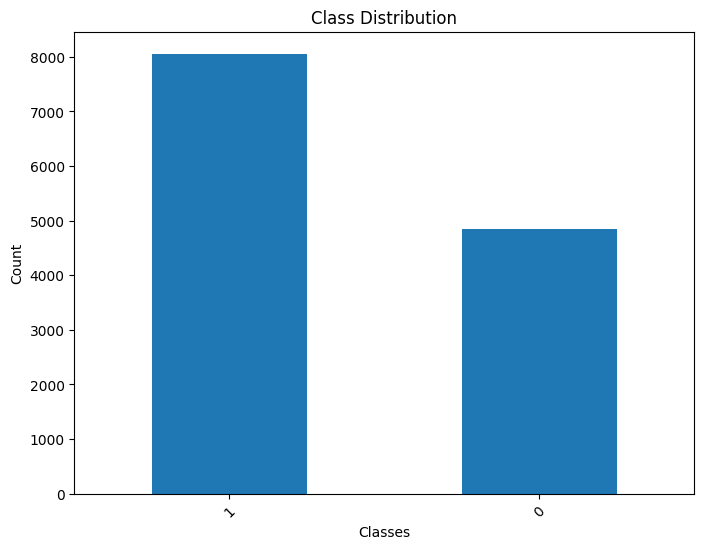

In [8]:
target = "DiagPeriodL90D"

# Count the occurrences of each class
class_counts = train_df[target].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Since the goal here is to predict whether patients got metatastic cancer diagnosis or not, it helps to visualize the classes as a histogram to see if there is any imbalance. And as seen there is a significant class imbalance

C:\Users\Aarti Darji\AppData\Local\Temp\ipykernel_14080\3126880536.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


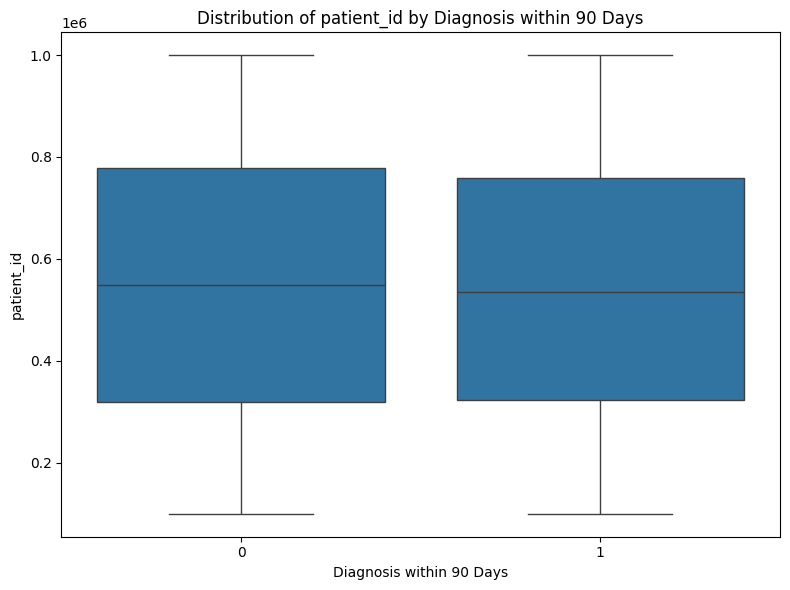

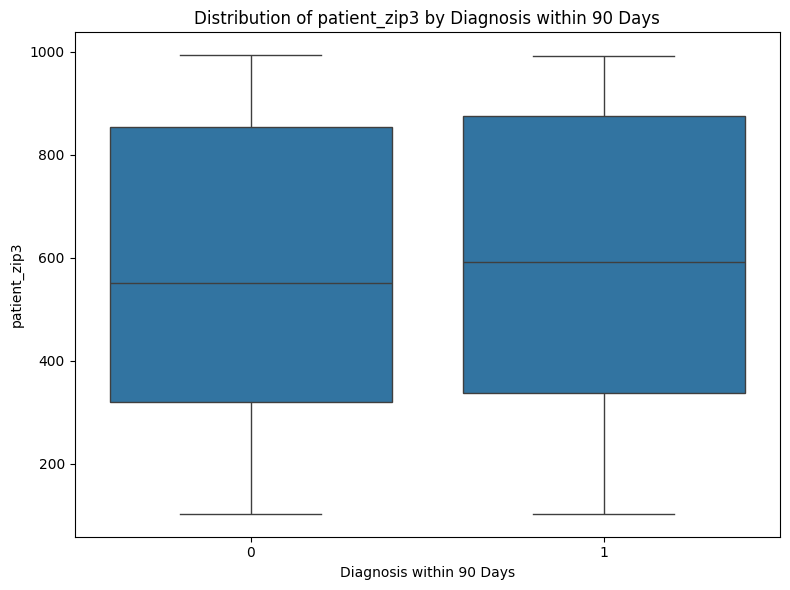

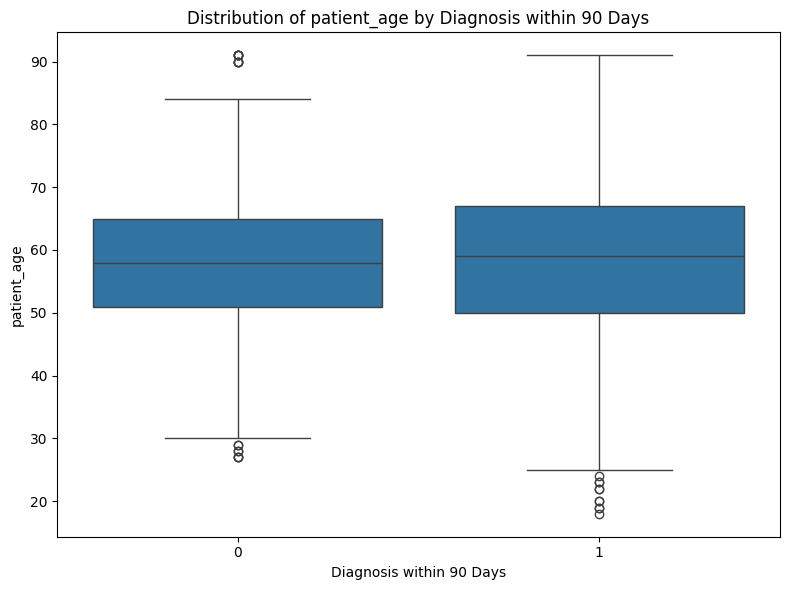

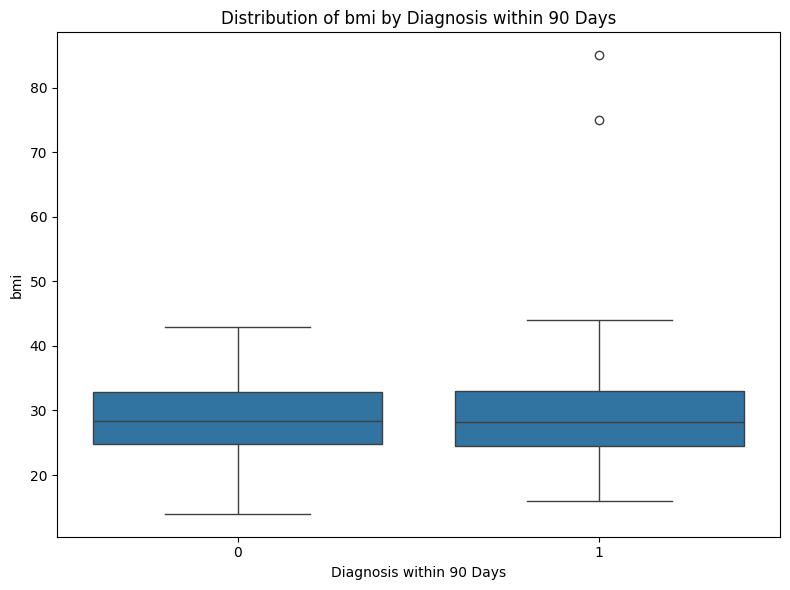

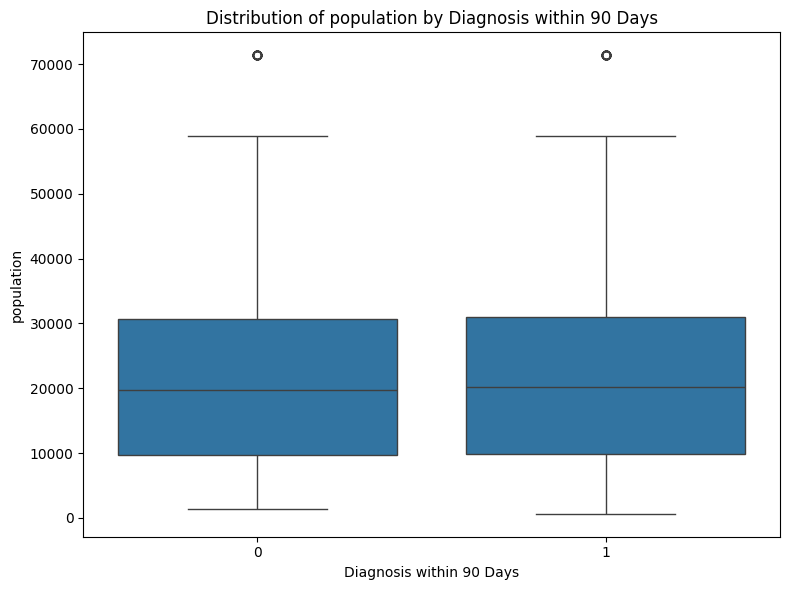

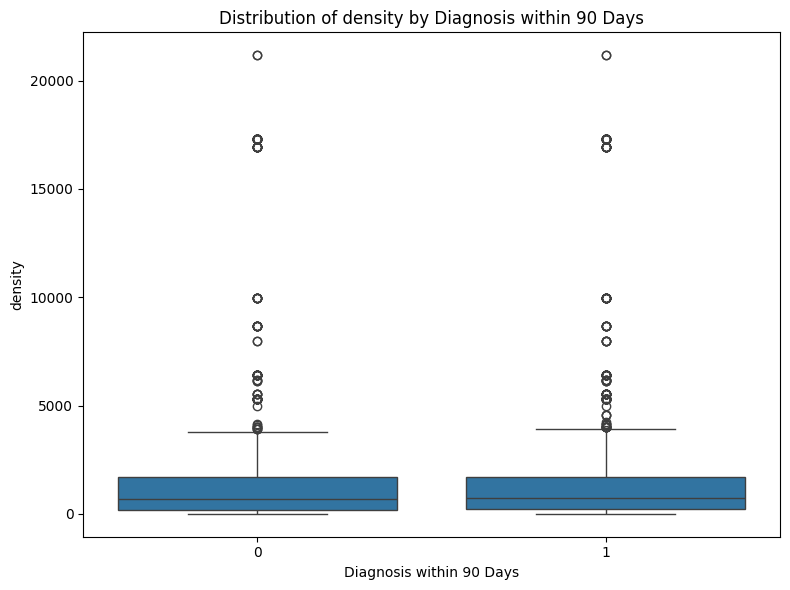

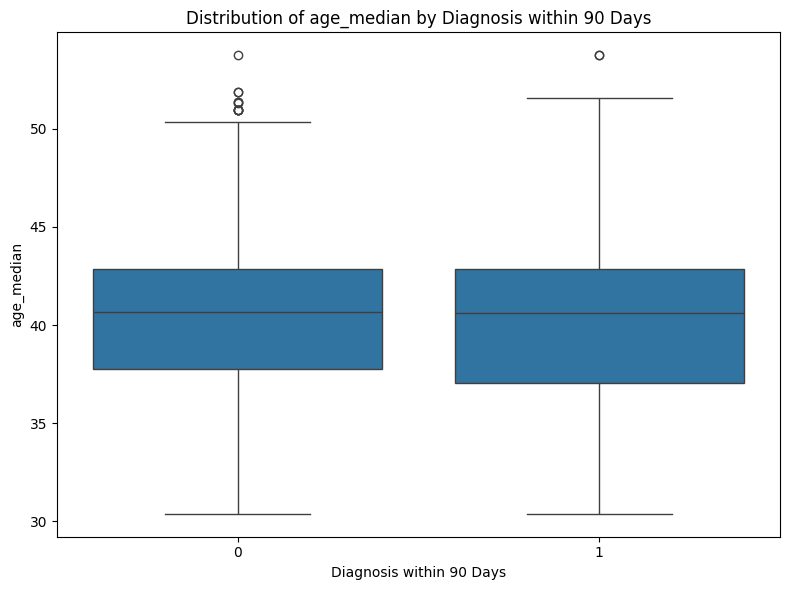

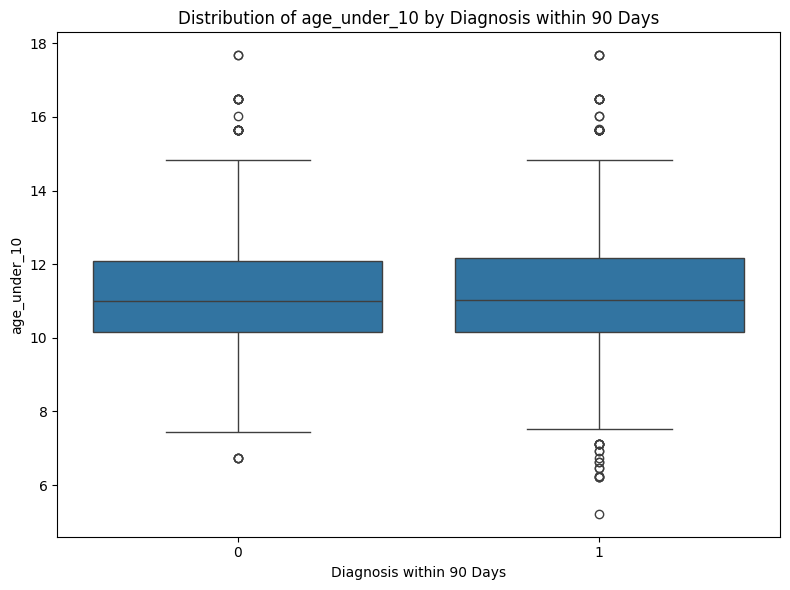

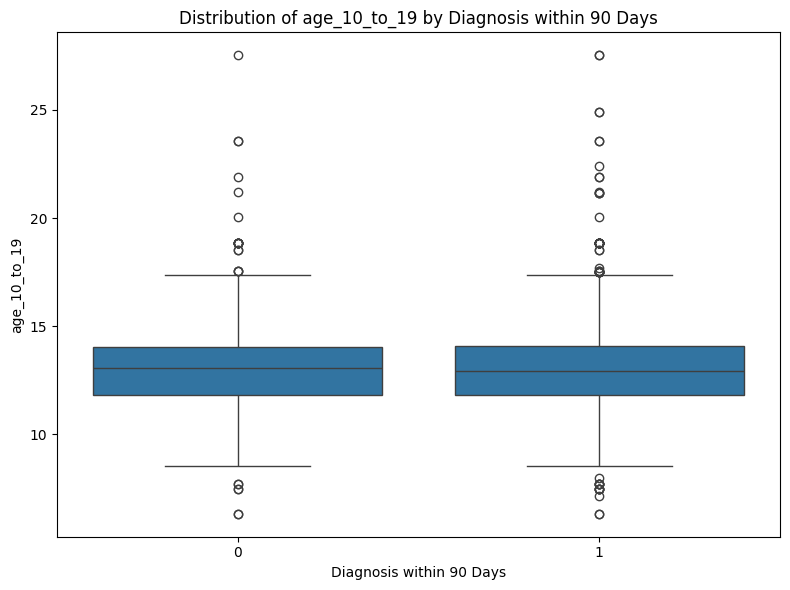

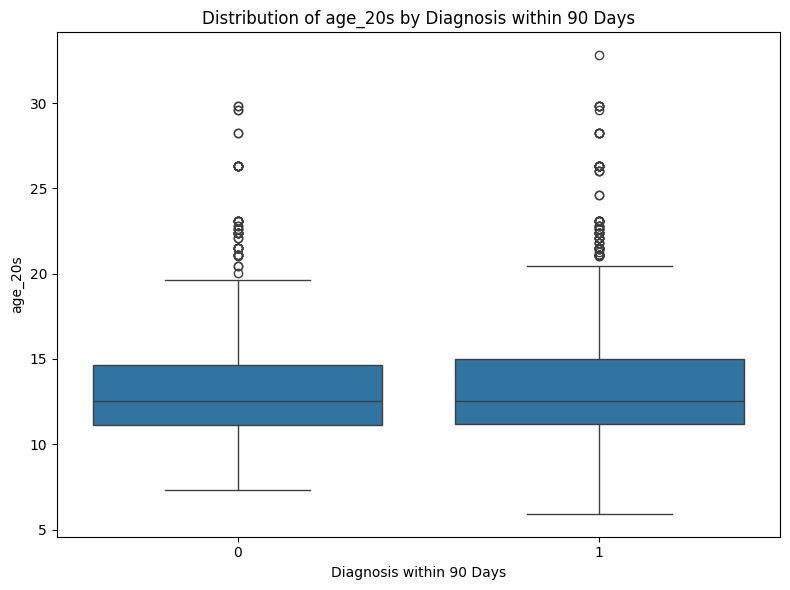

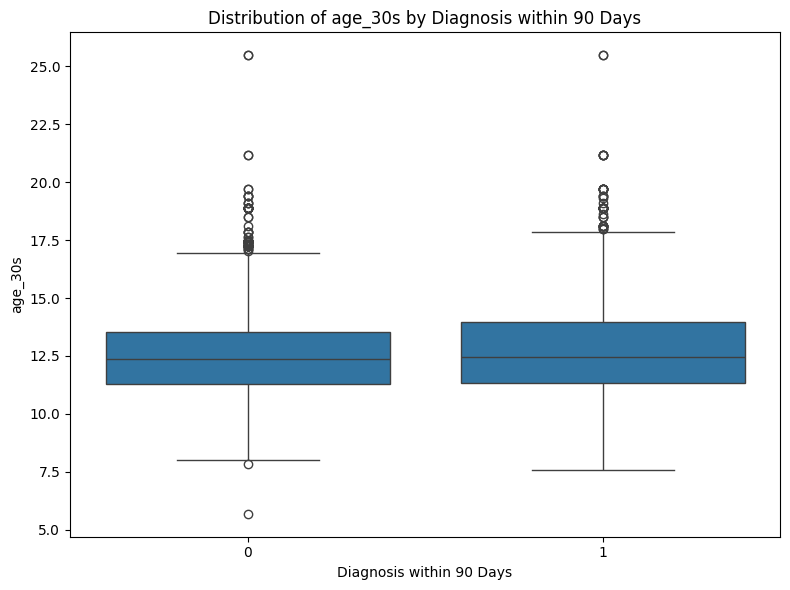

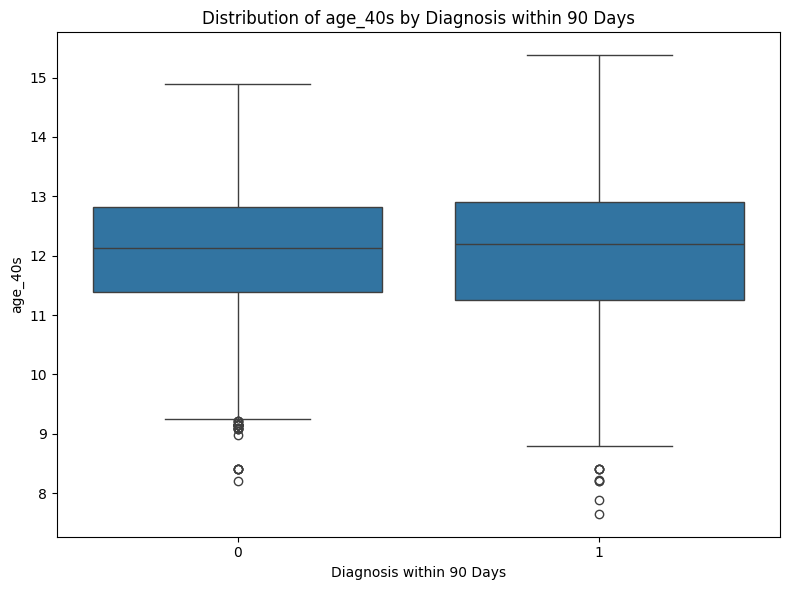

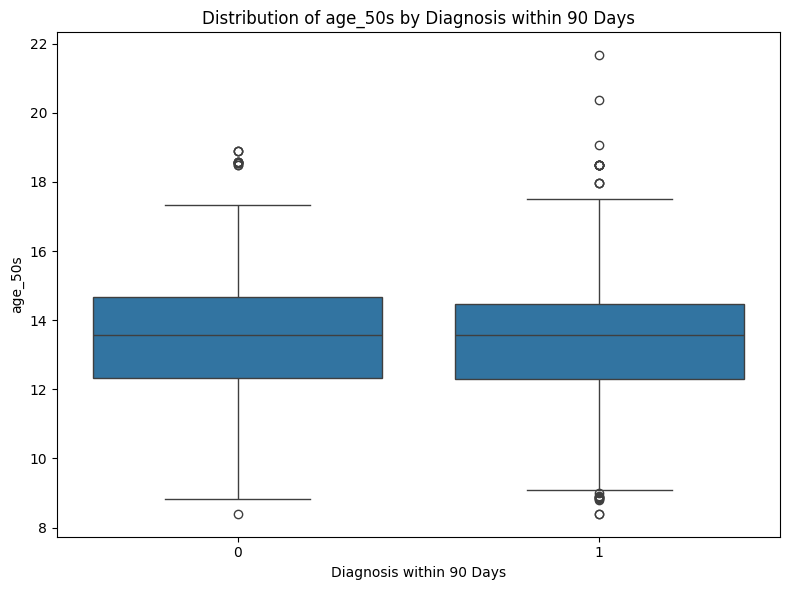

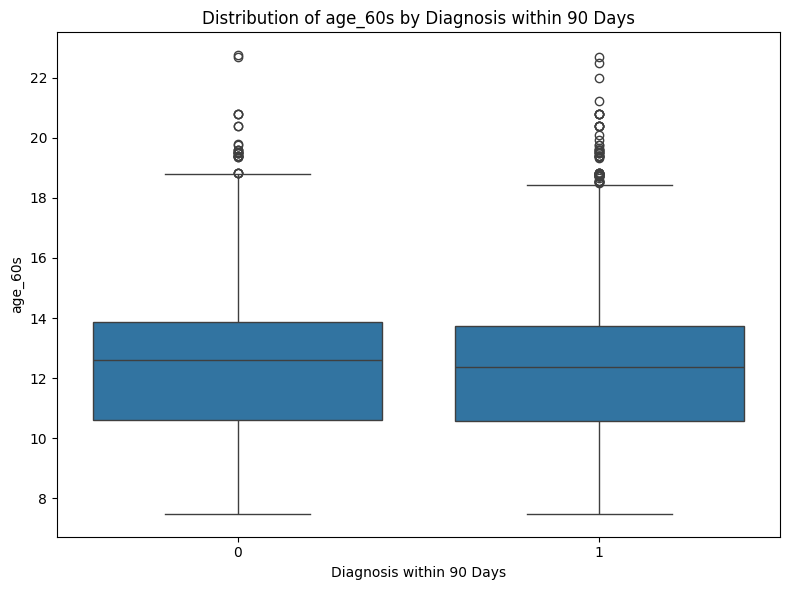

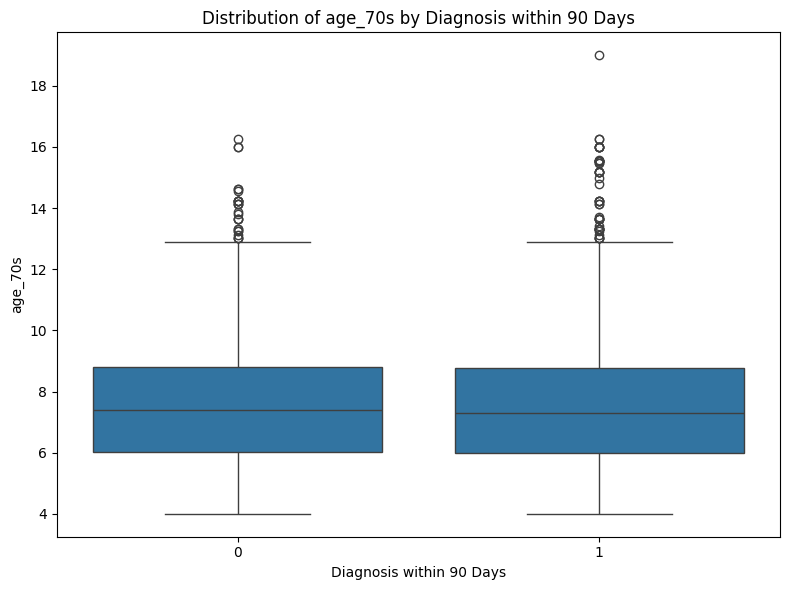

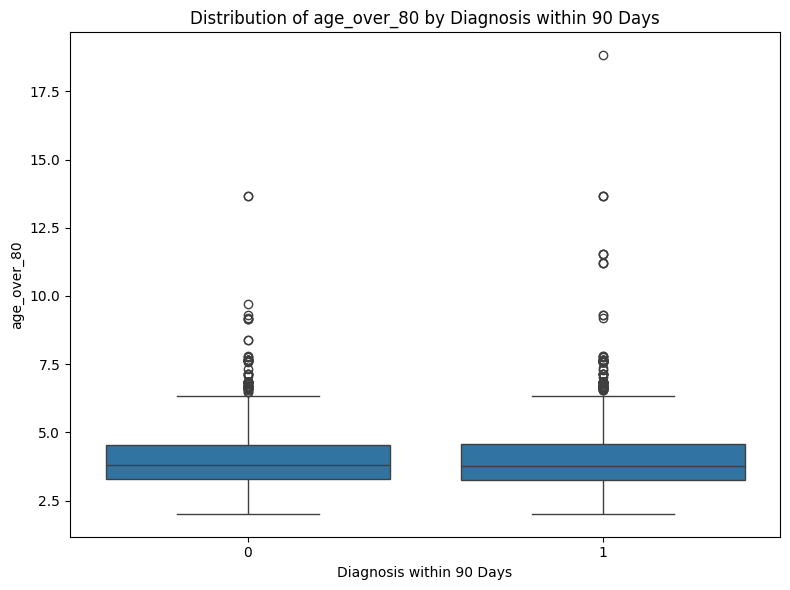

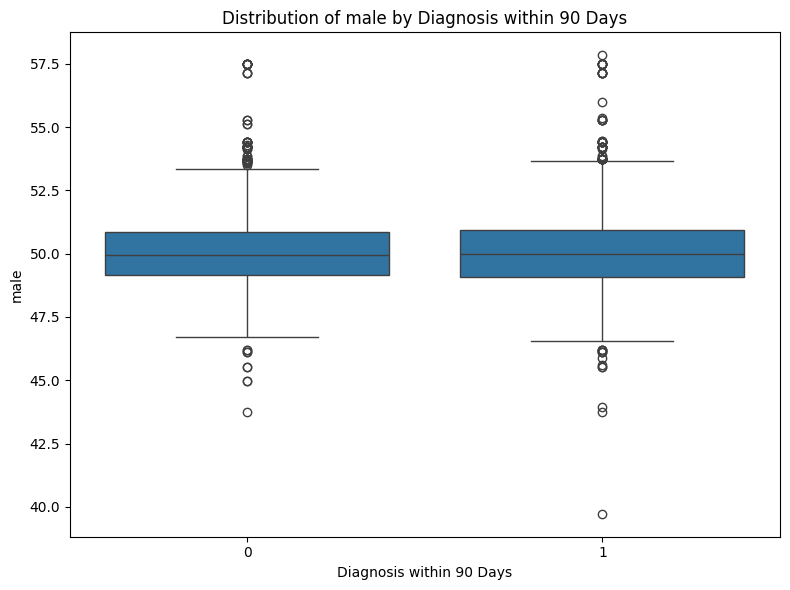

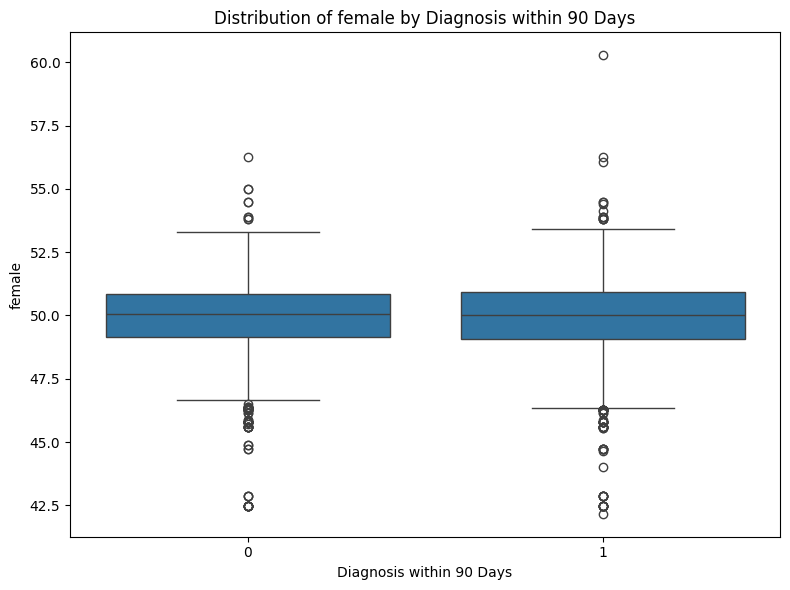

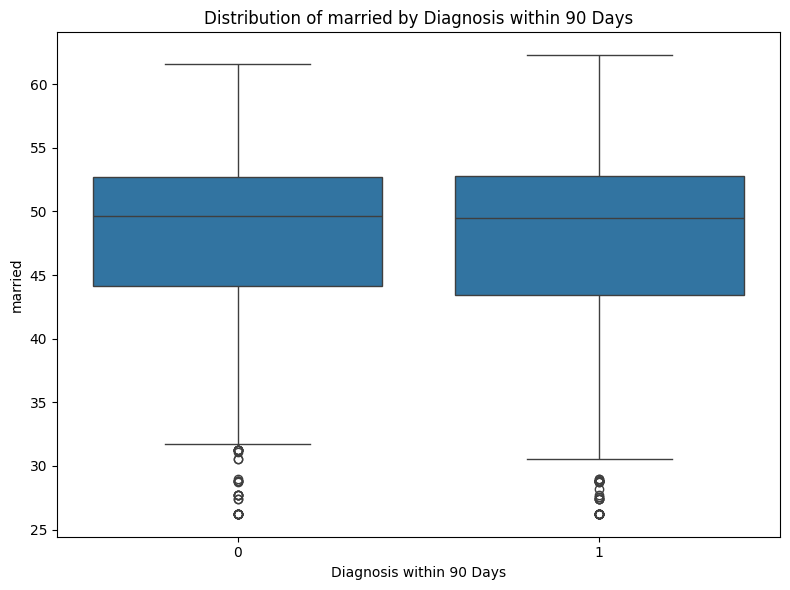

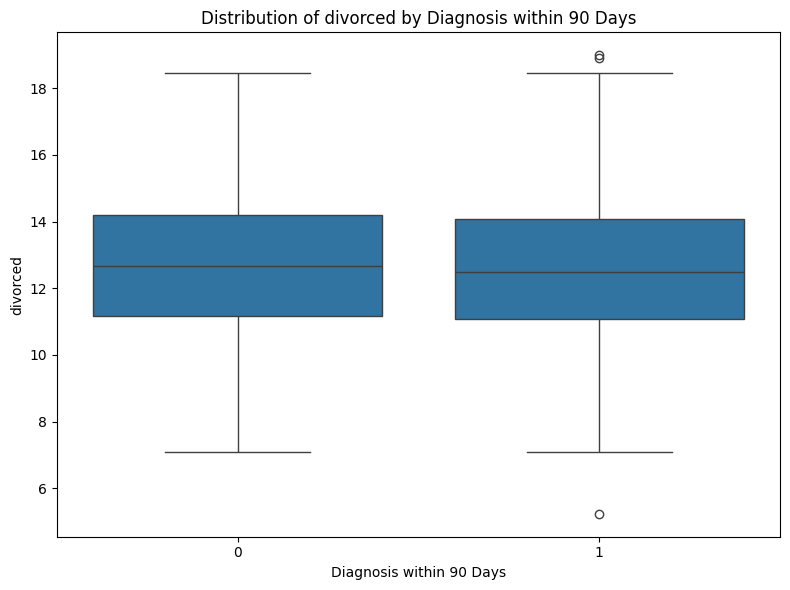

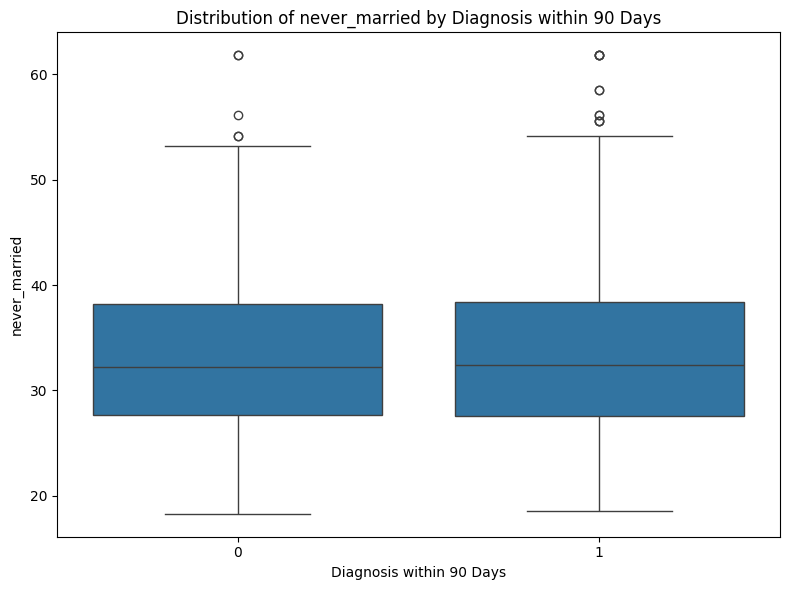

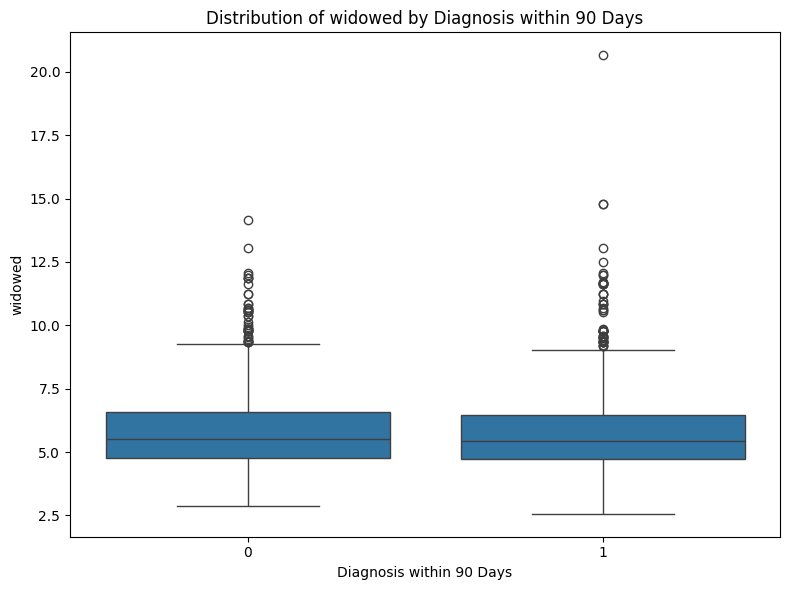

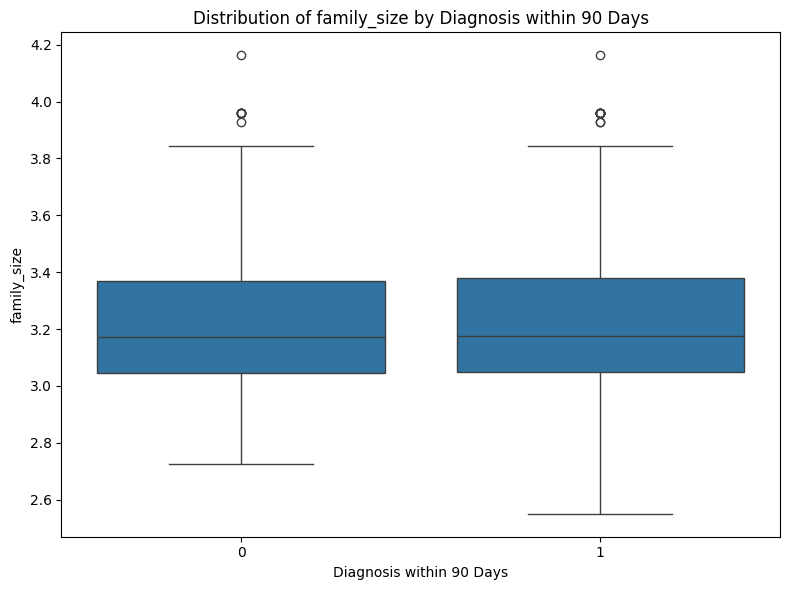

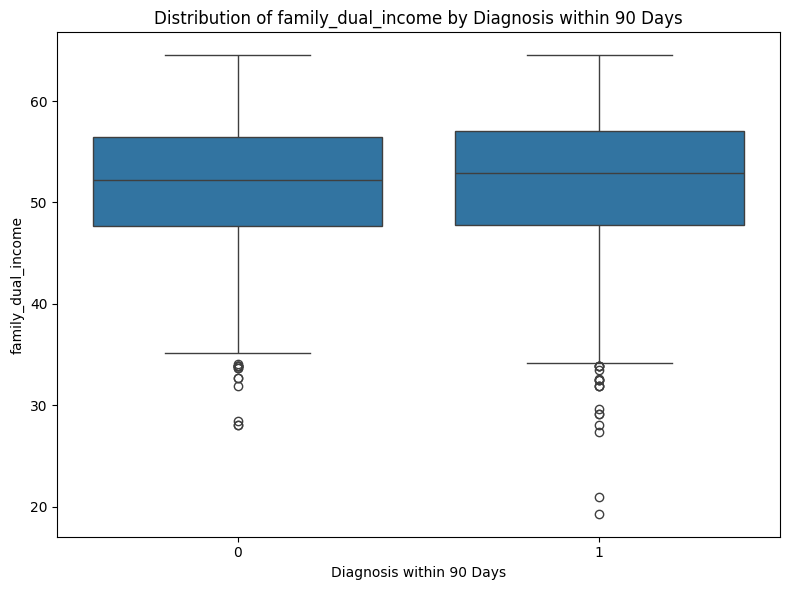

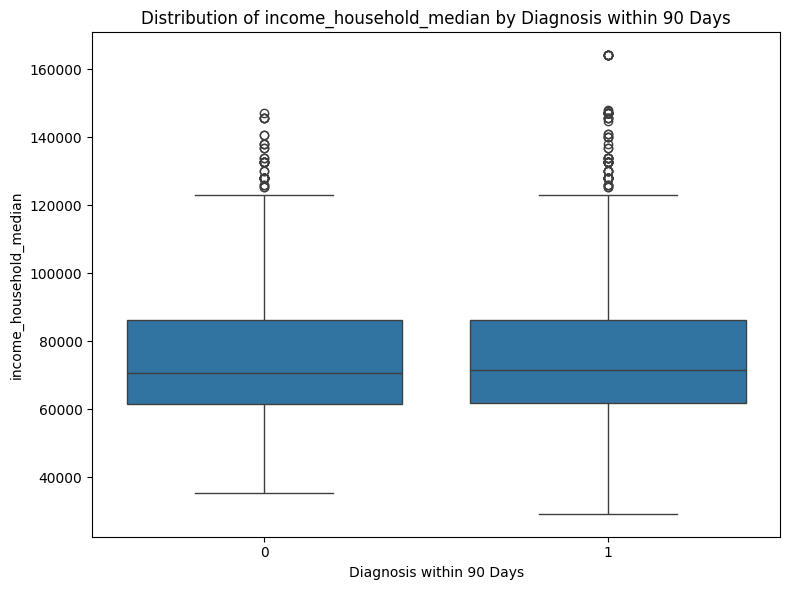

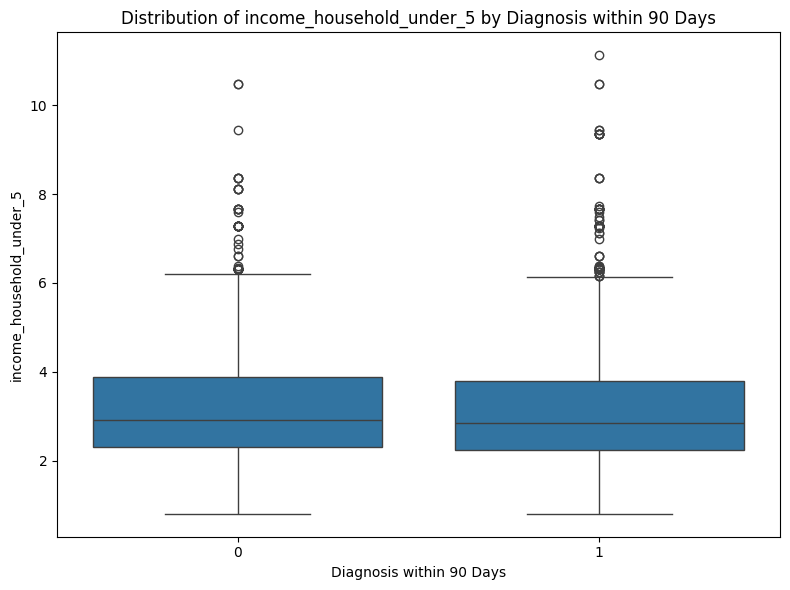

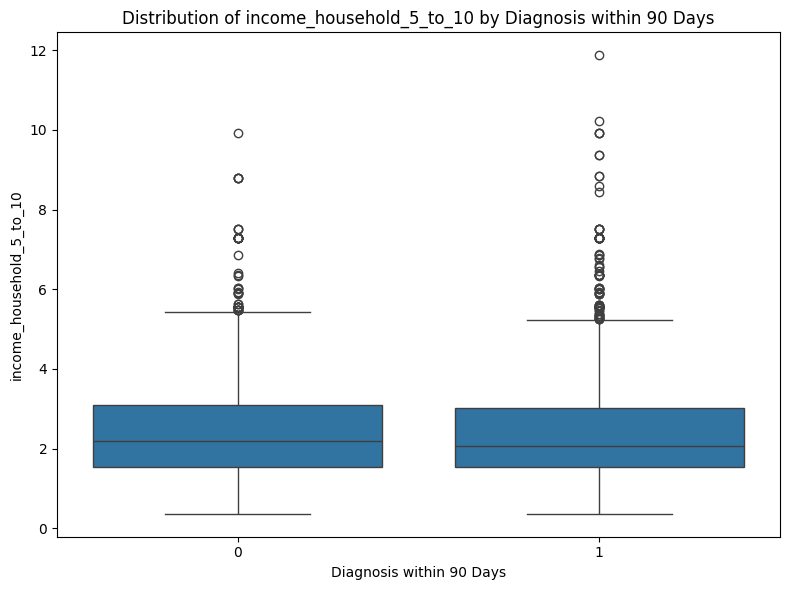

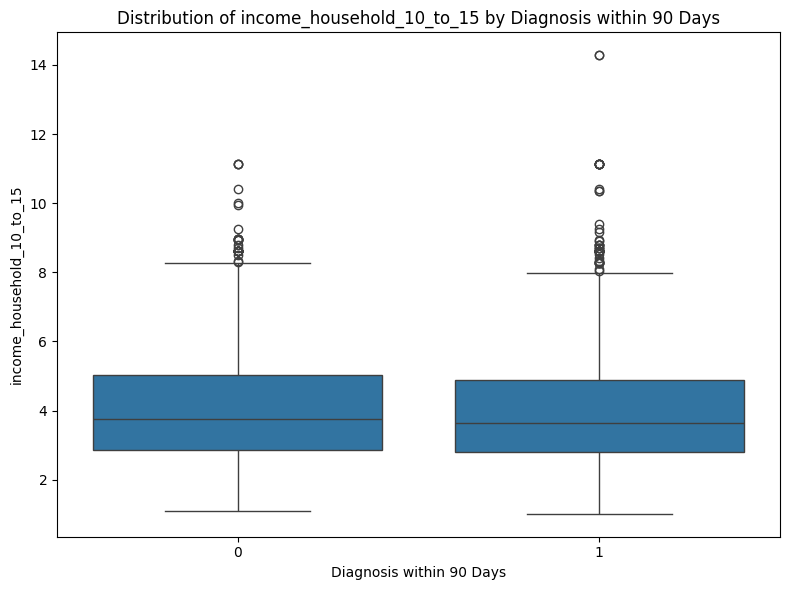

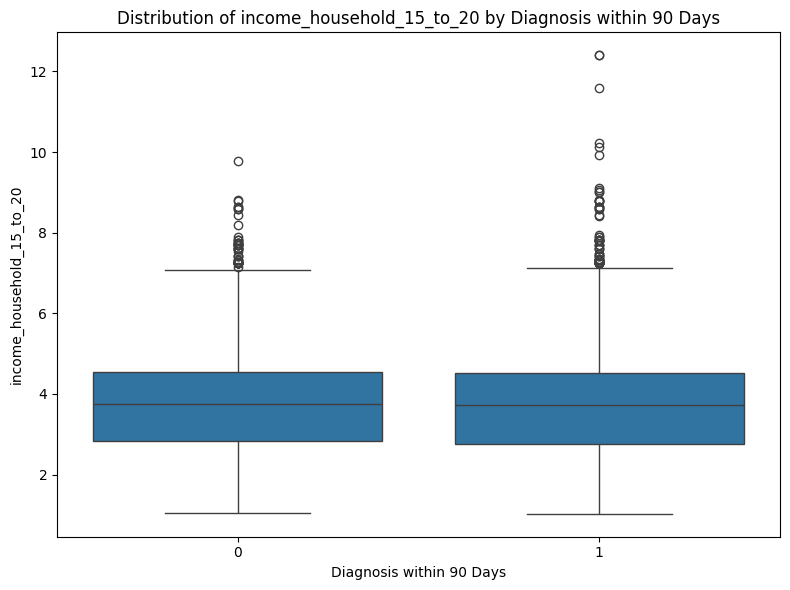

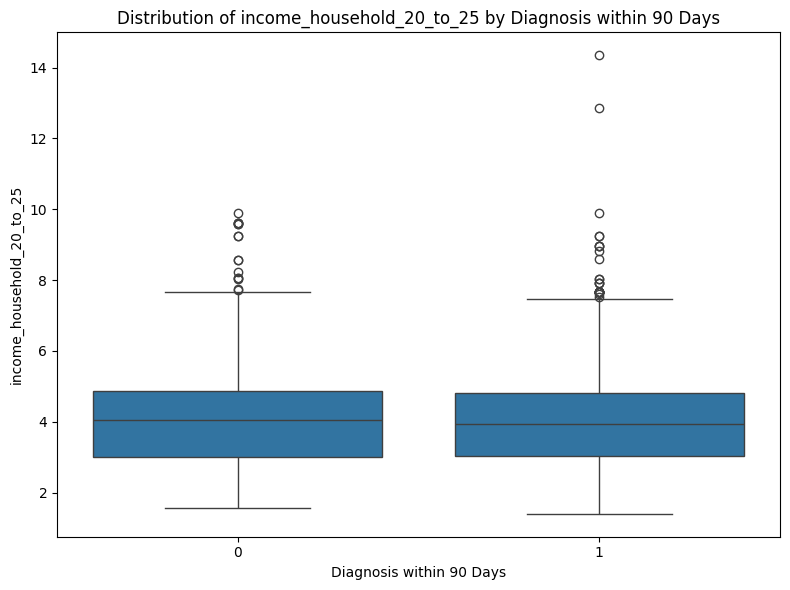

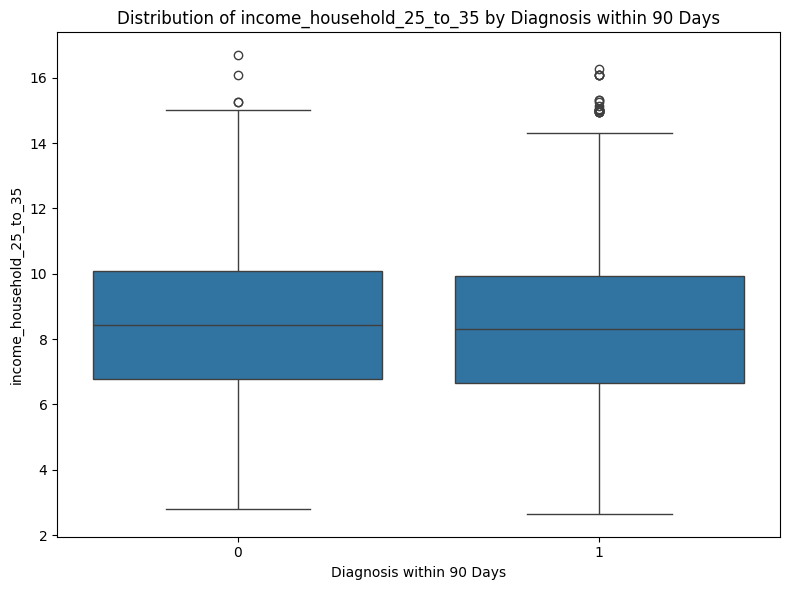

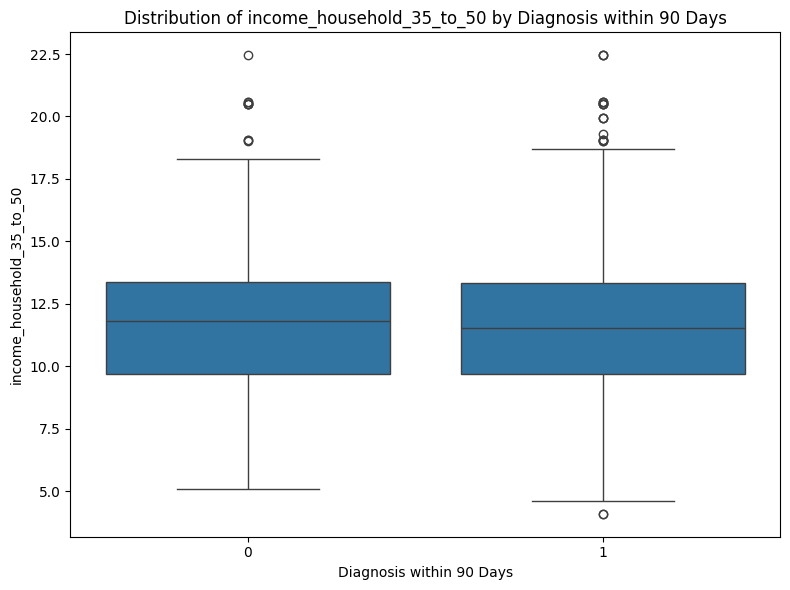

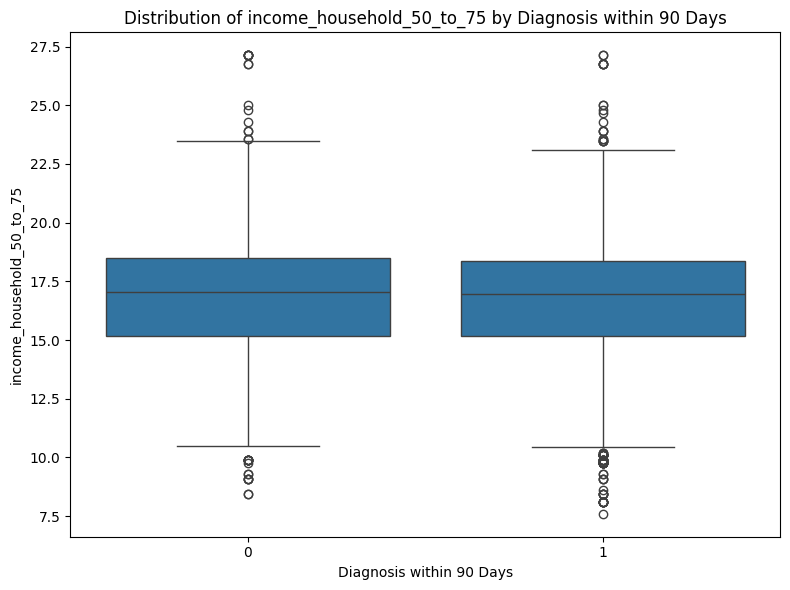

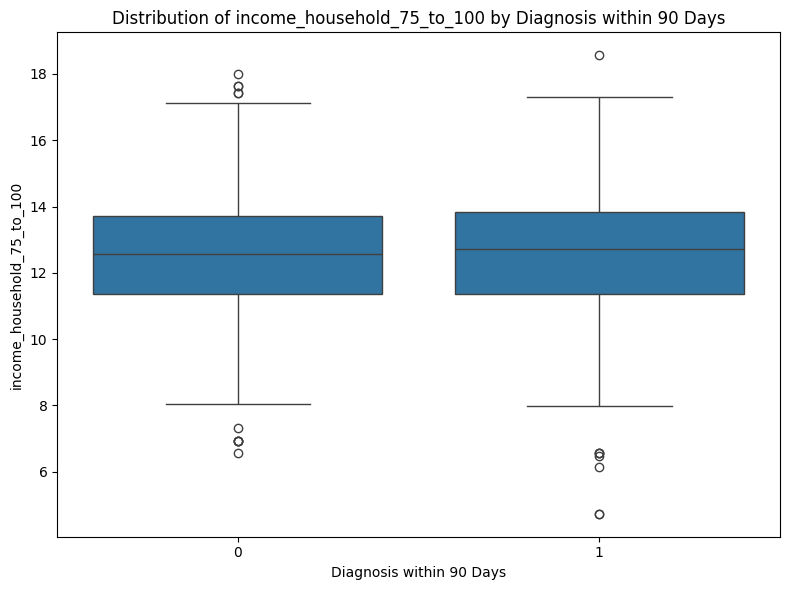

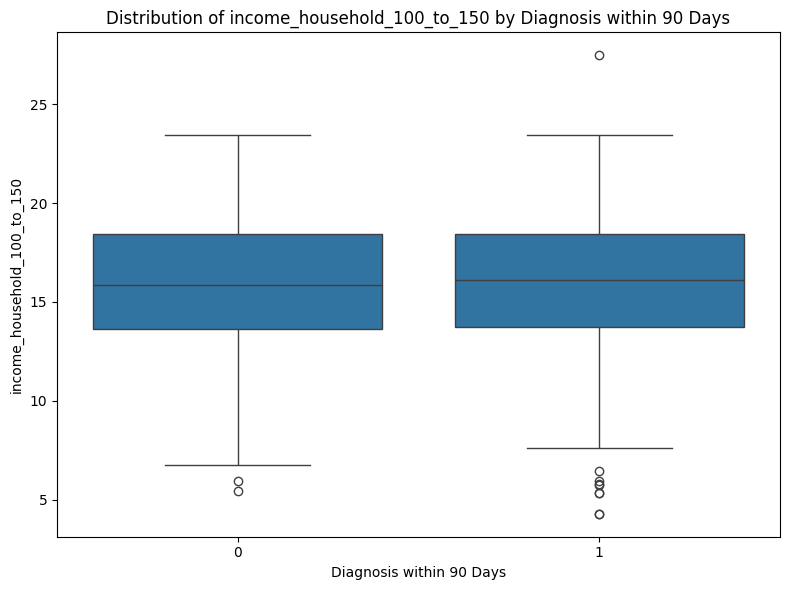

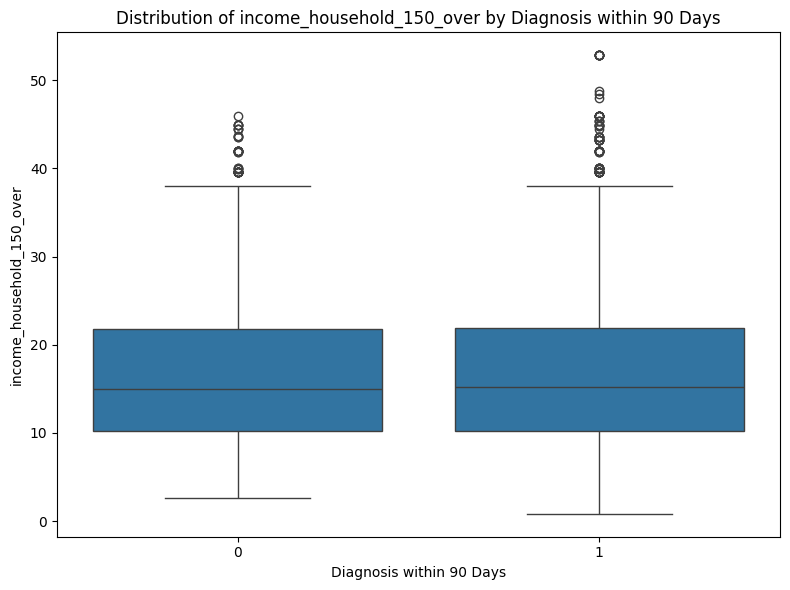

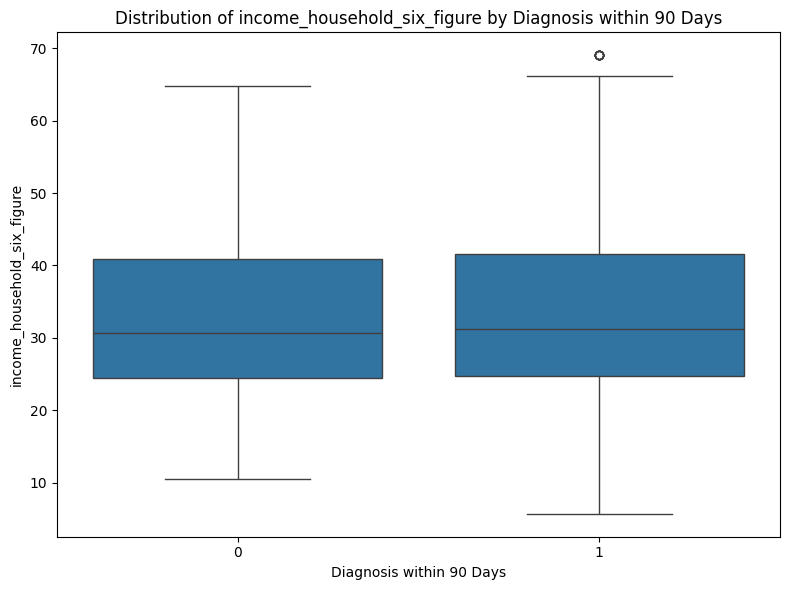

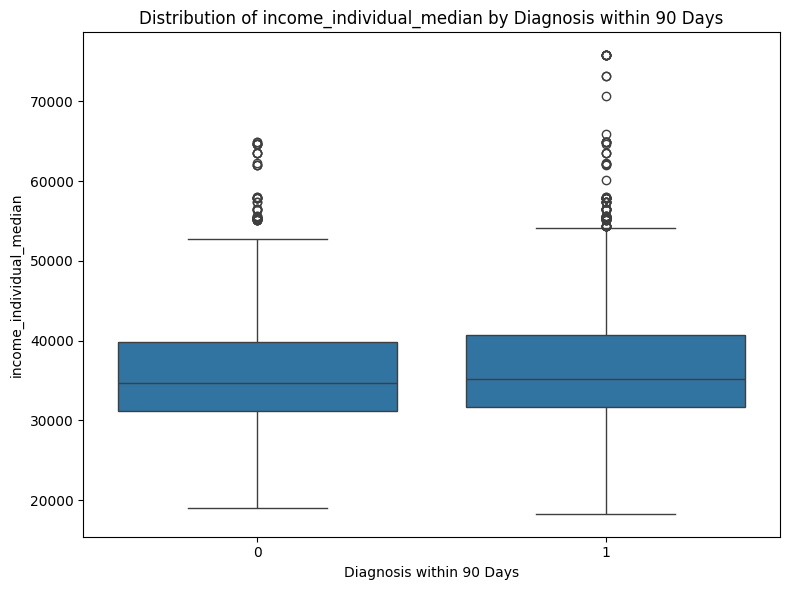

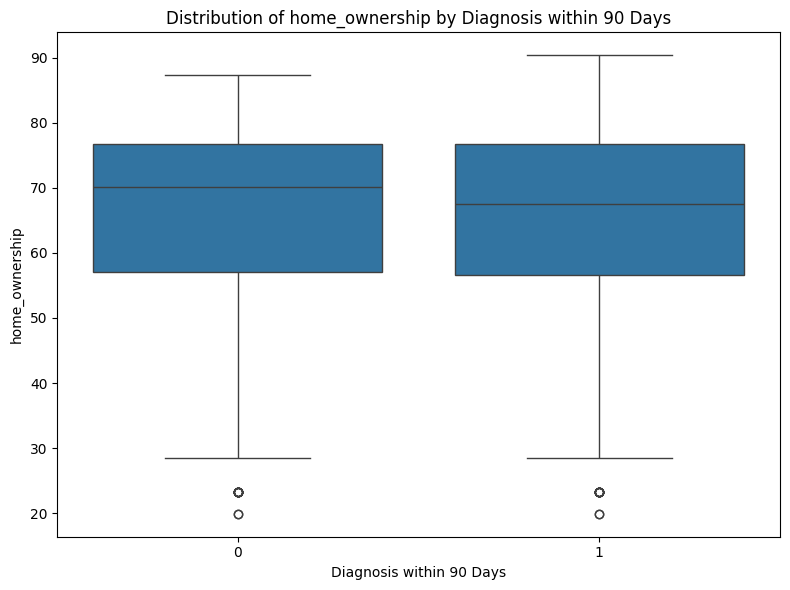

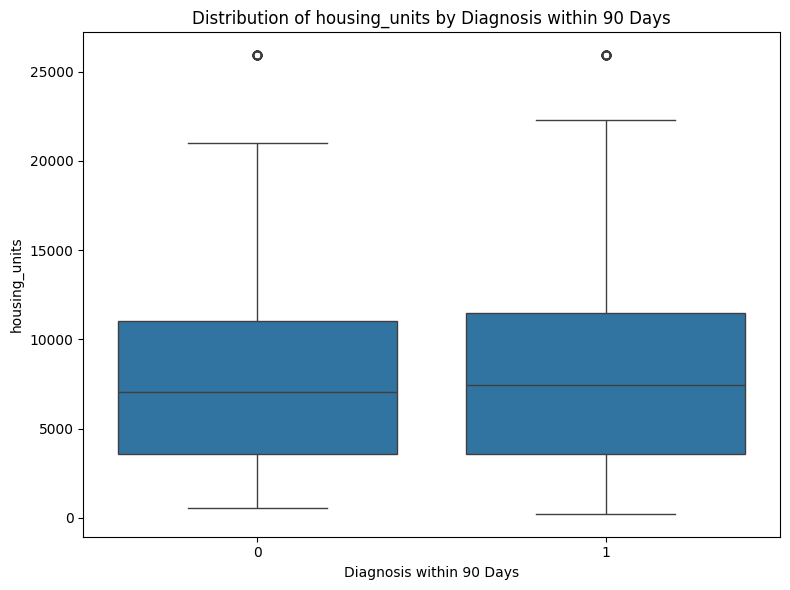

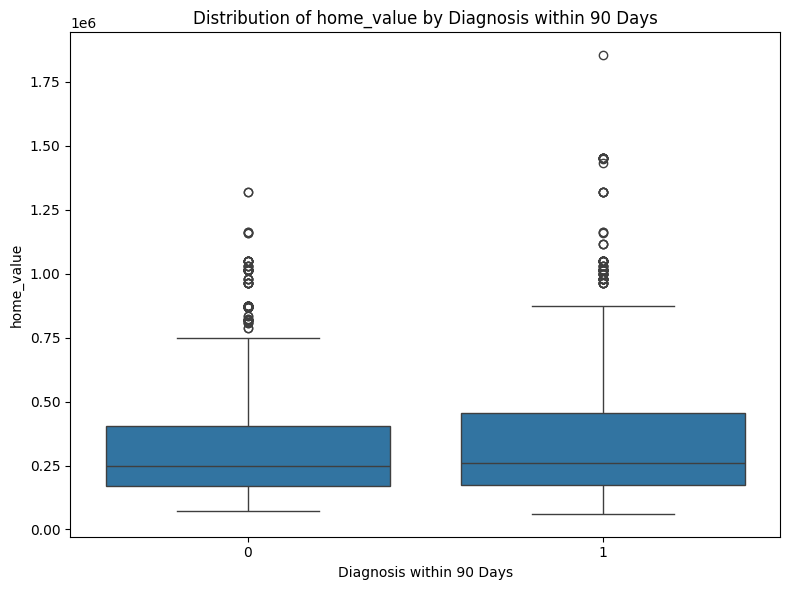

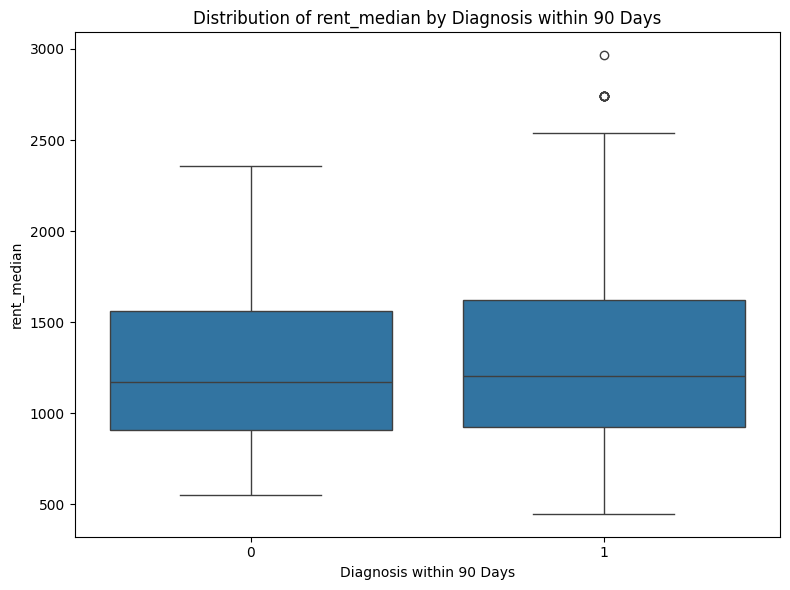

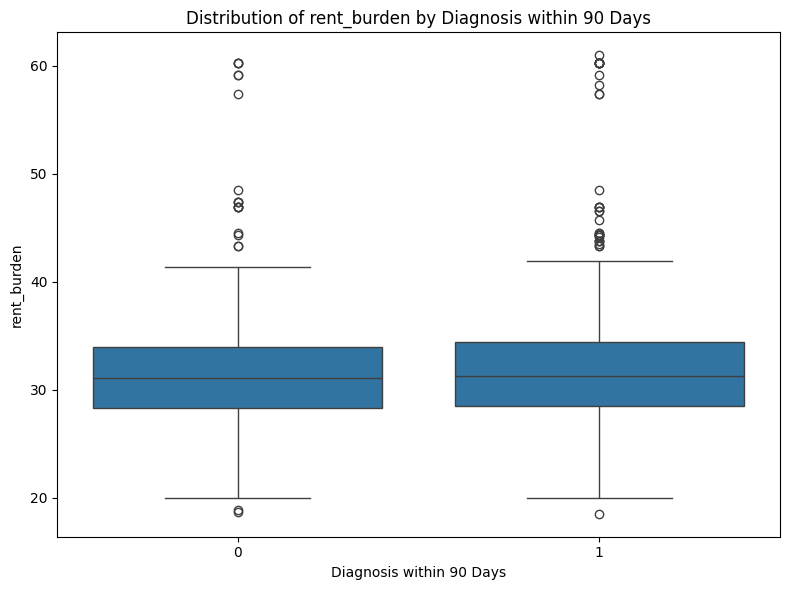

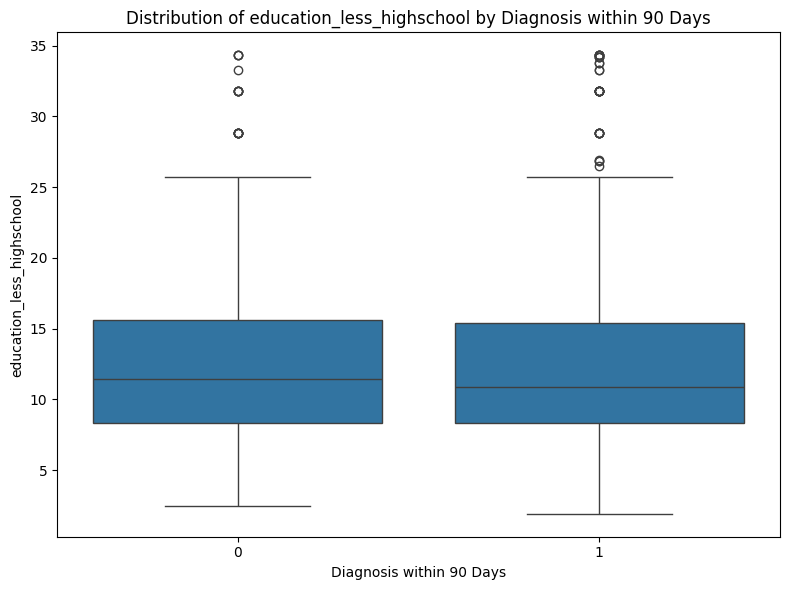

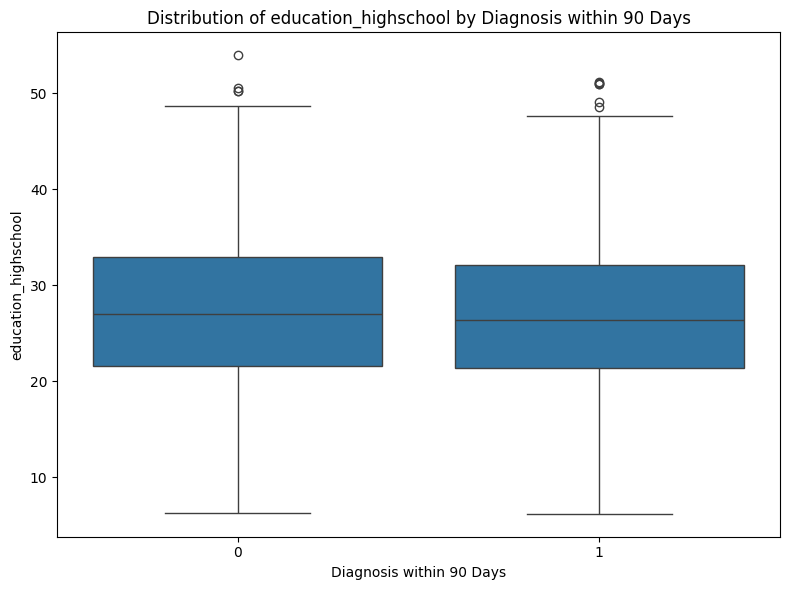

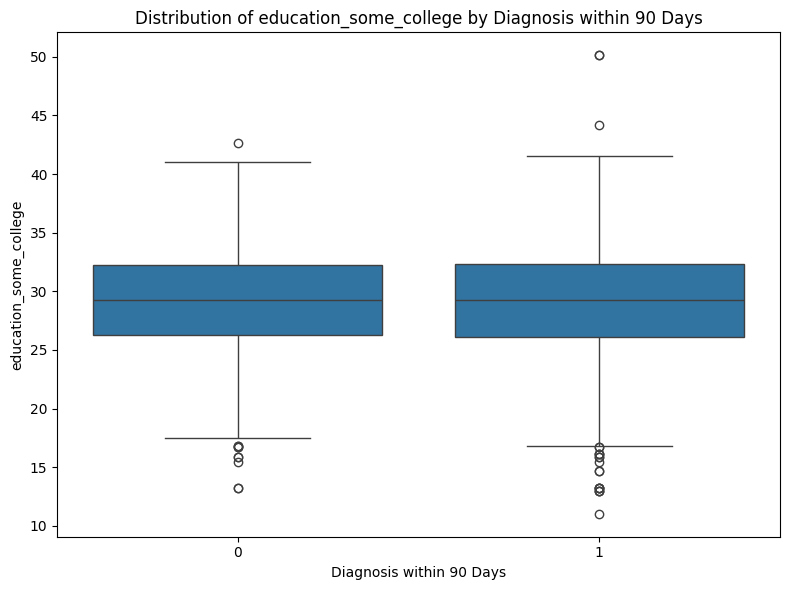

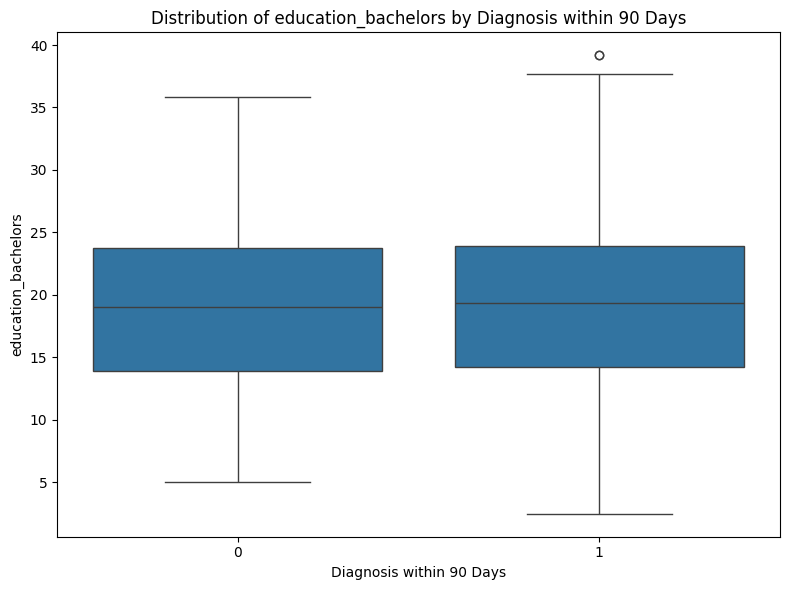

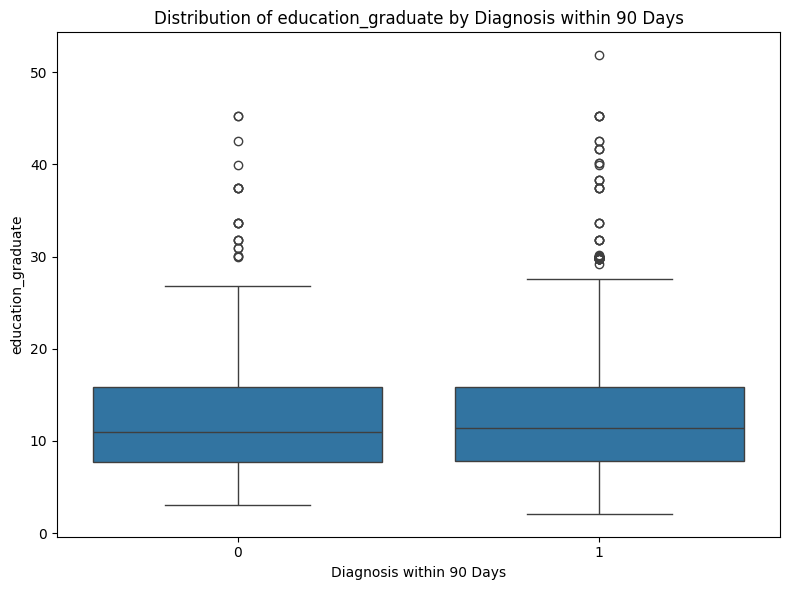

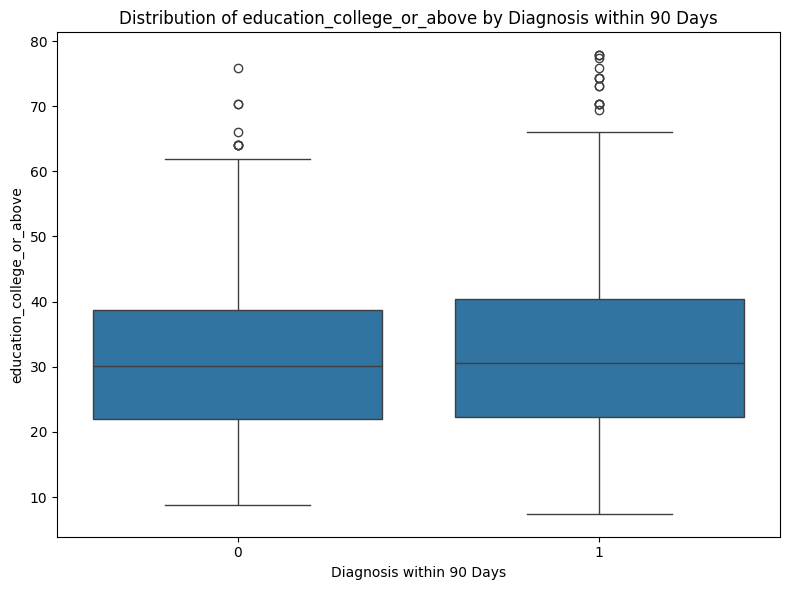

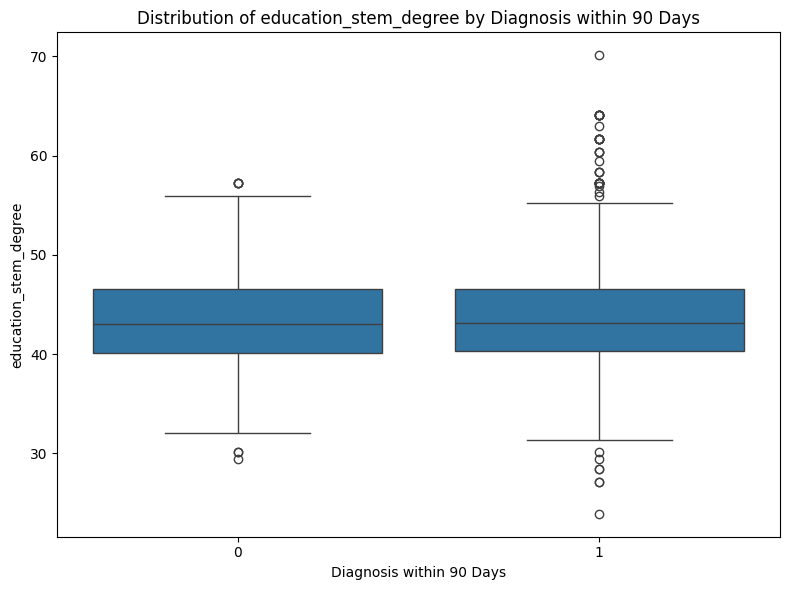

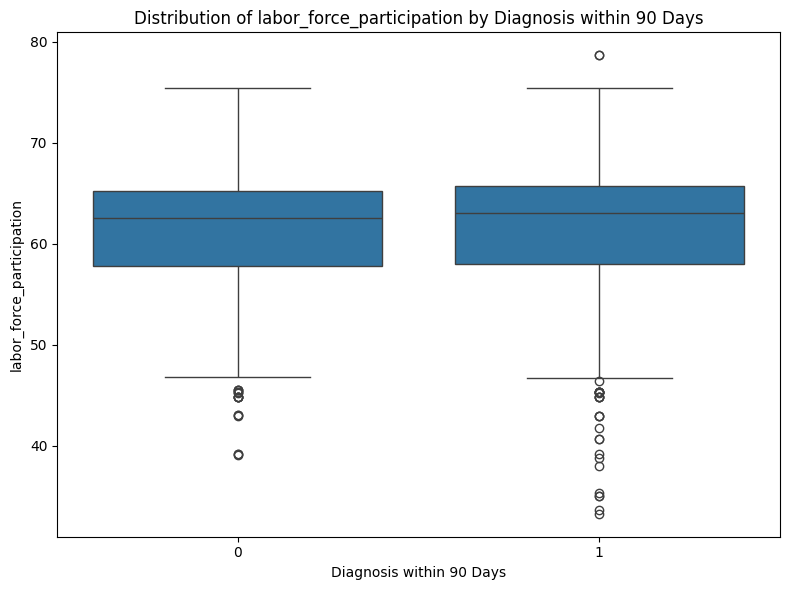

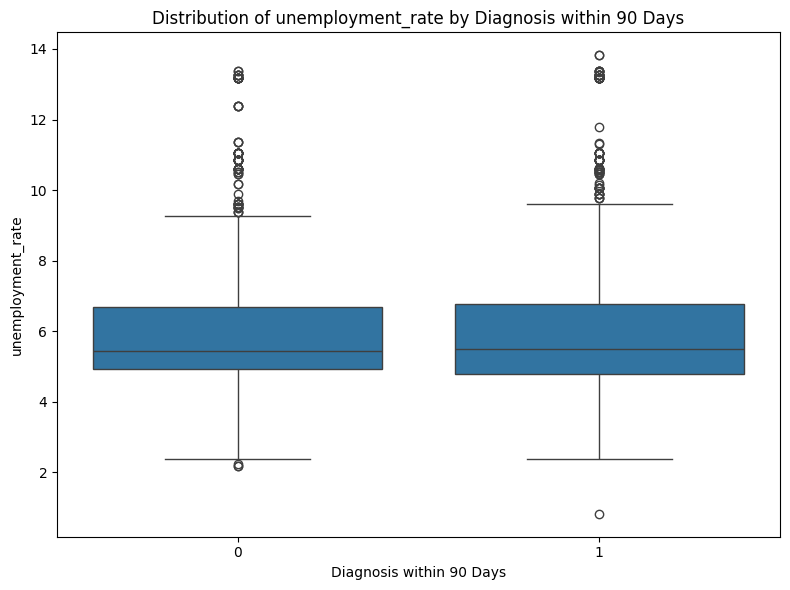

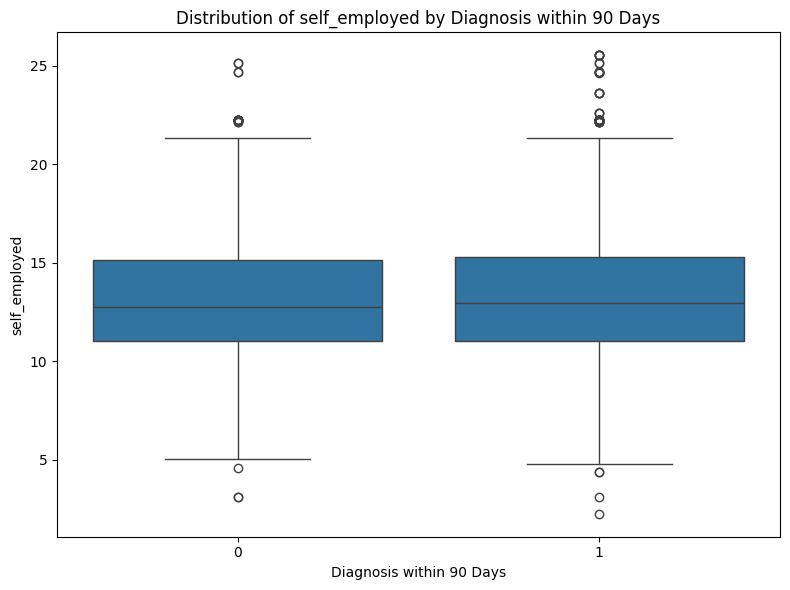

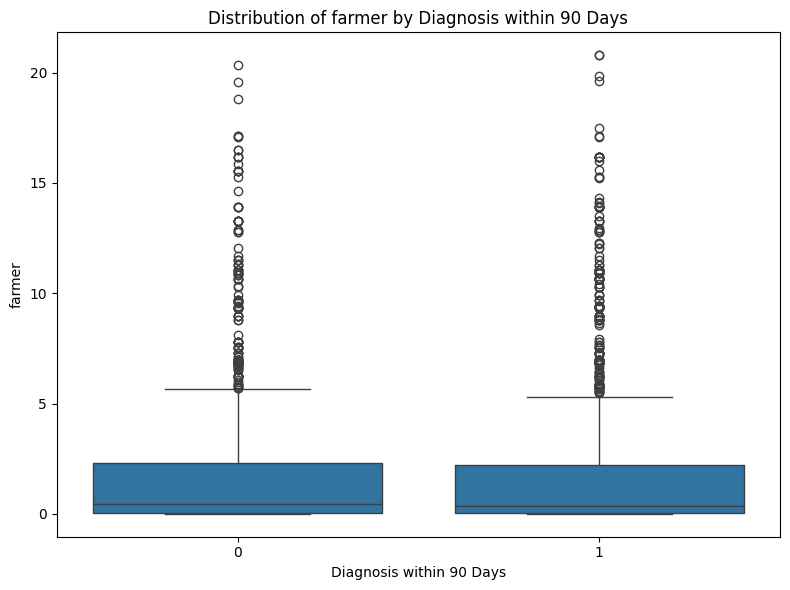

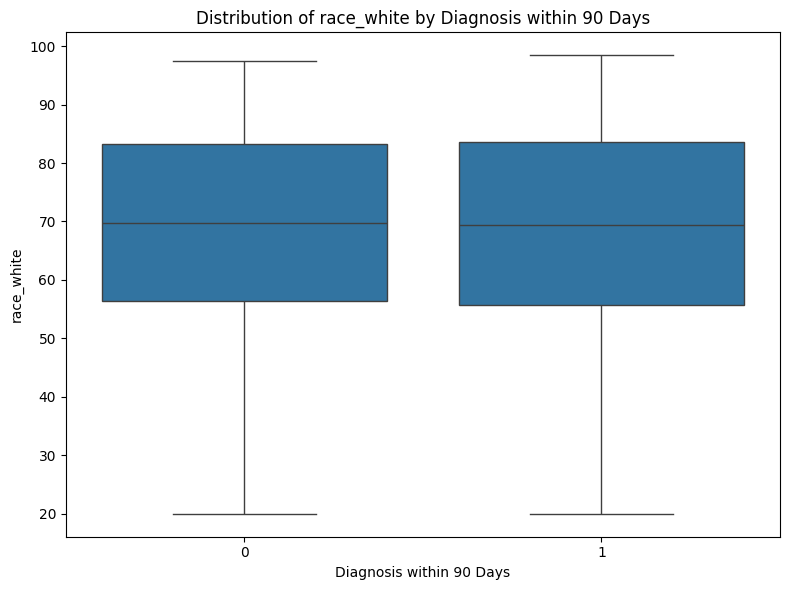

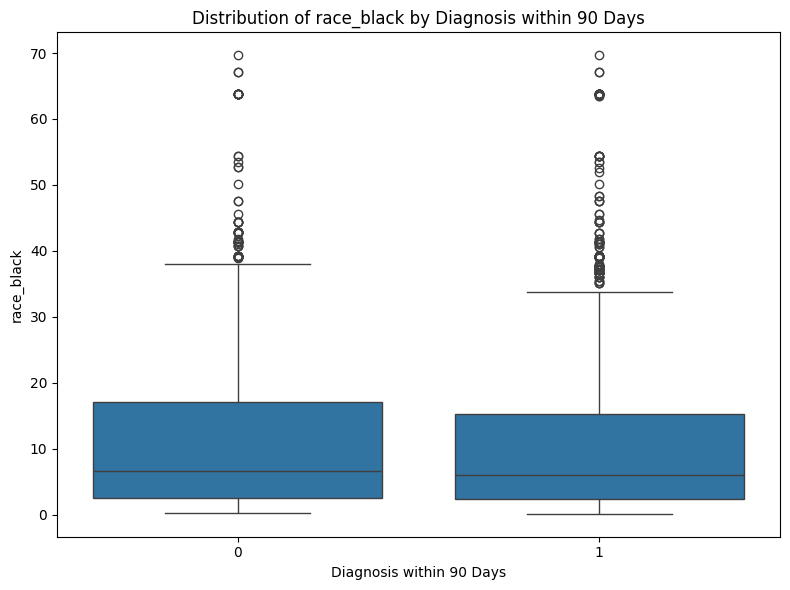

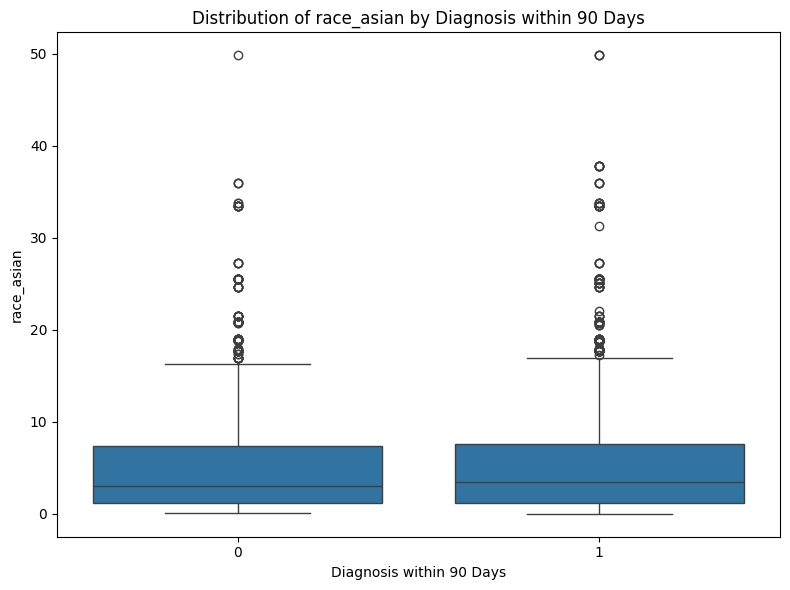

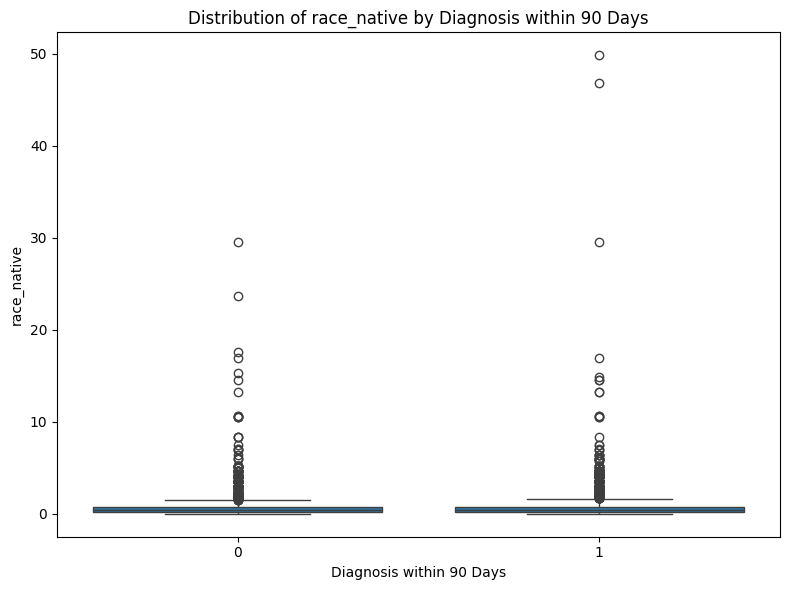

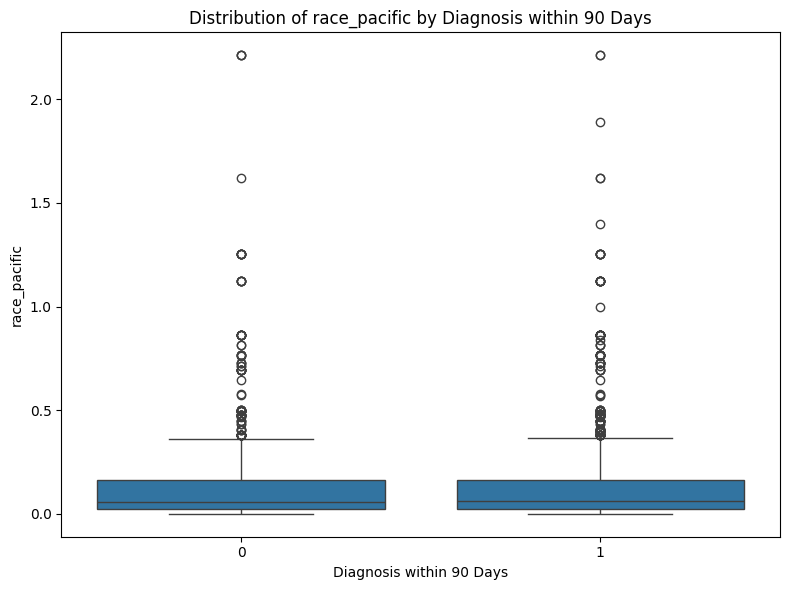

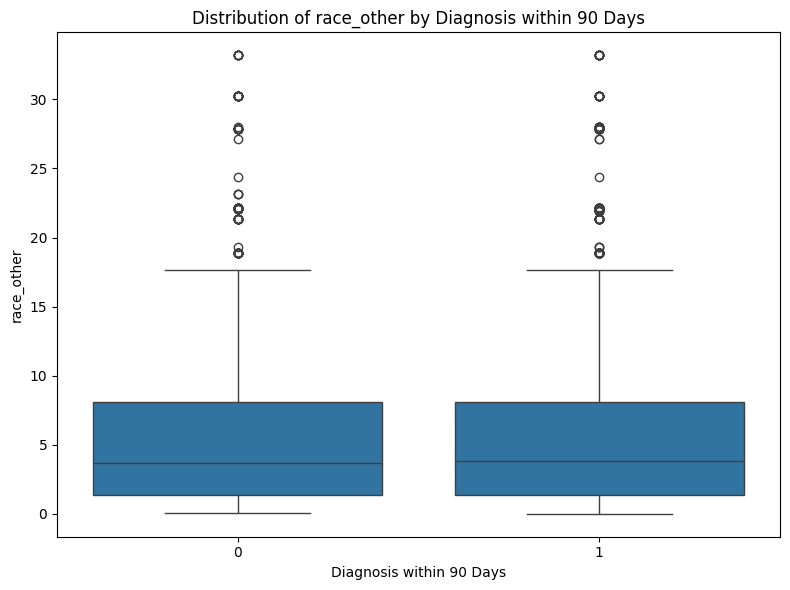

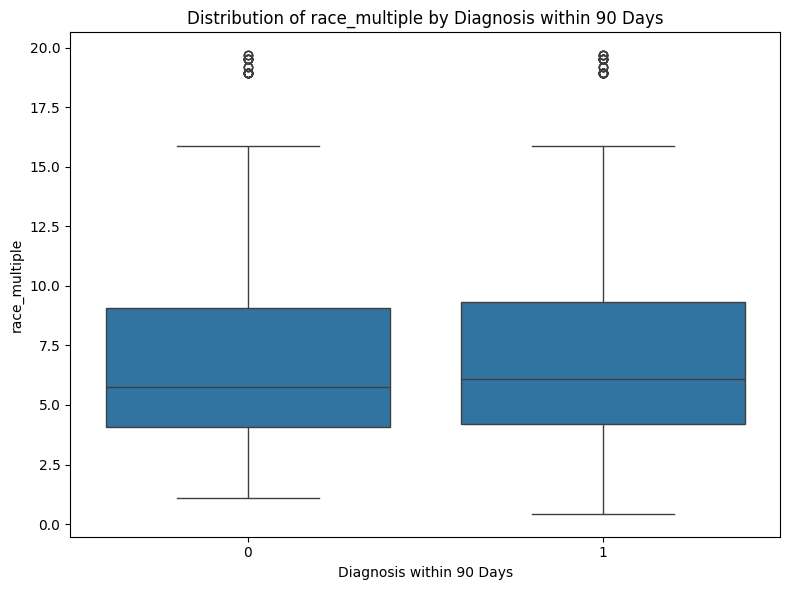

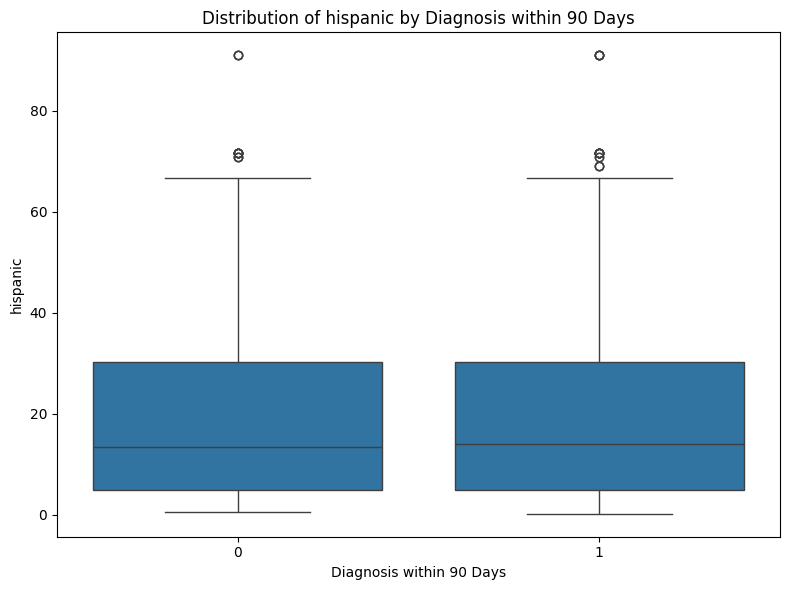

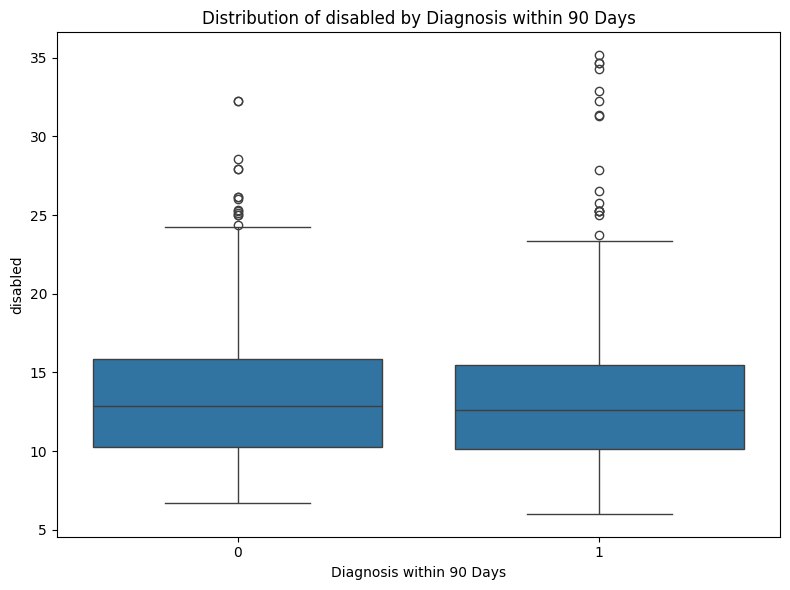

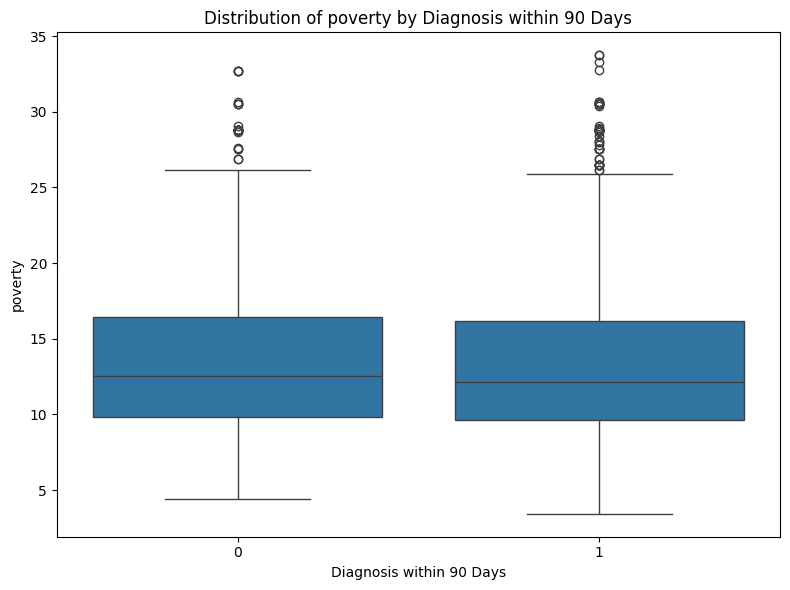

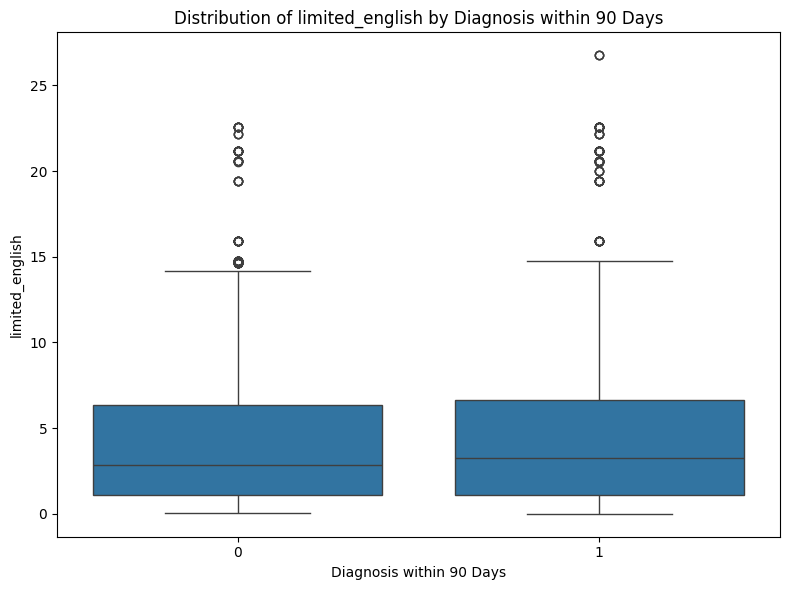

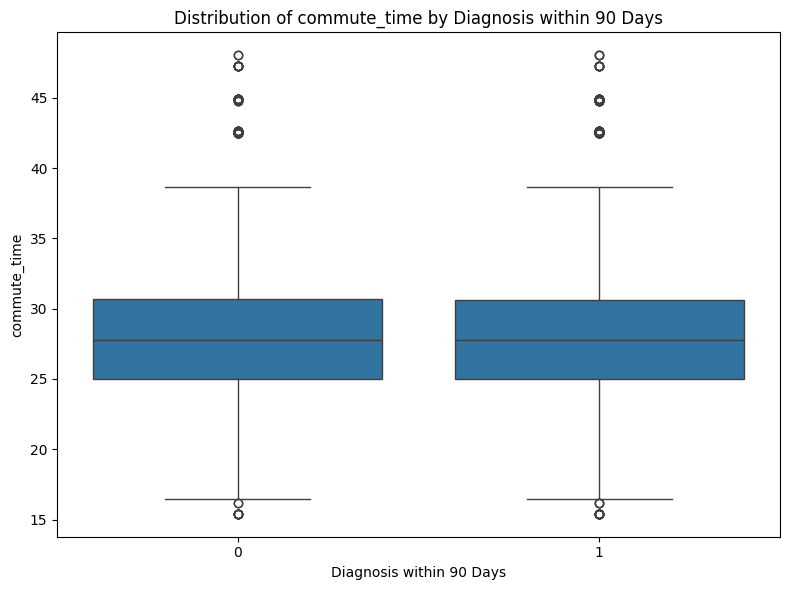

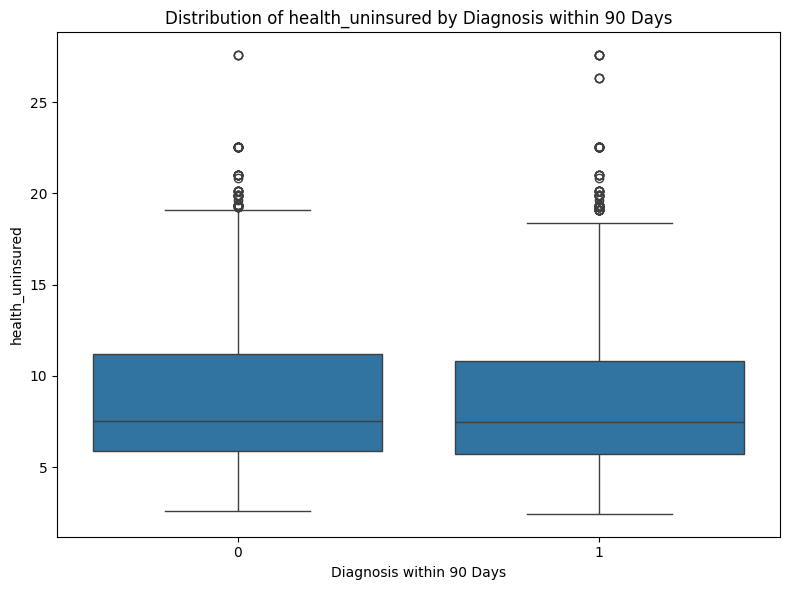

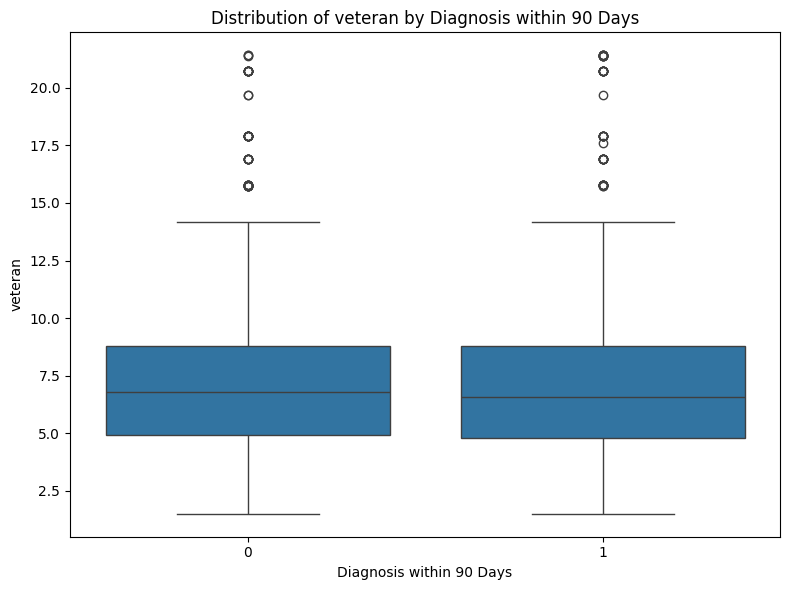

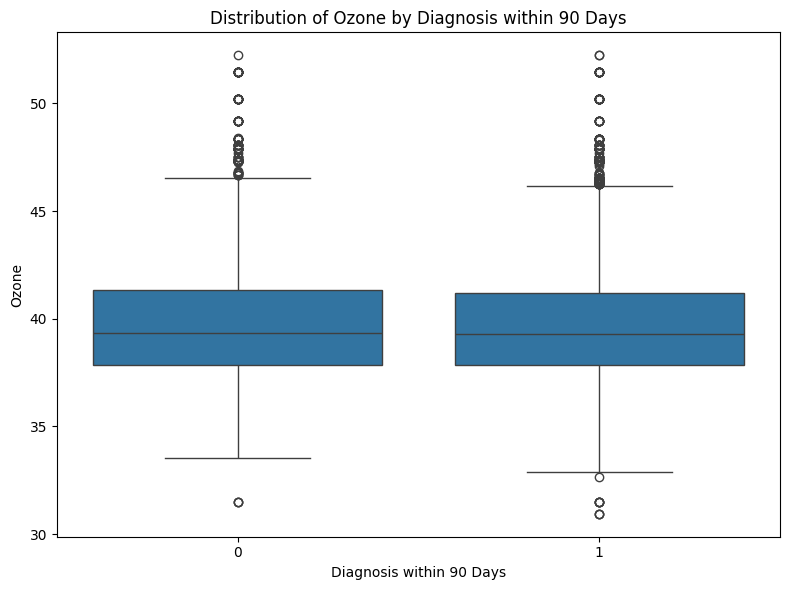

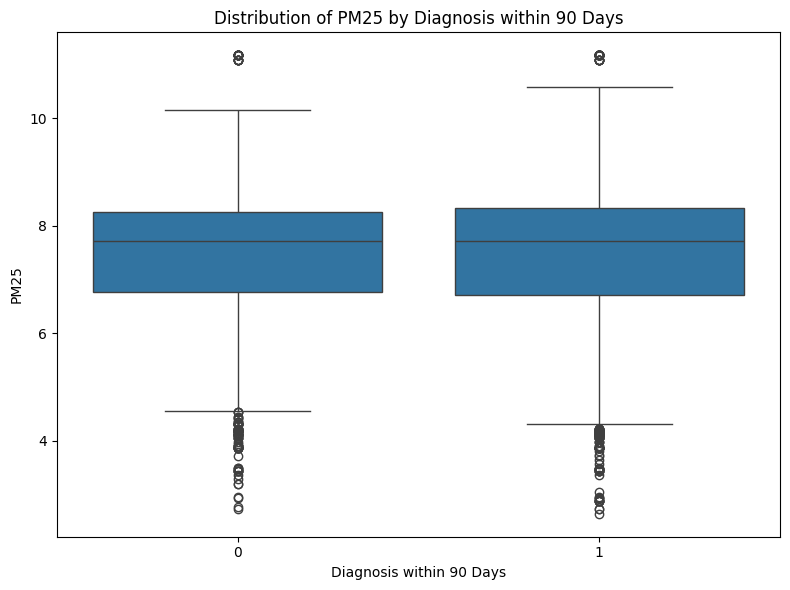

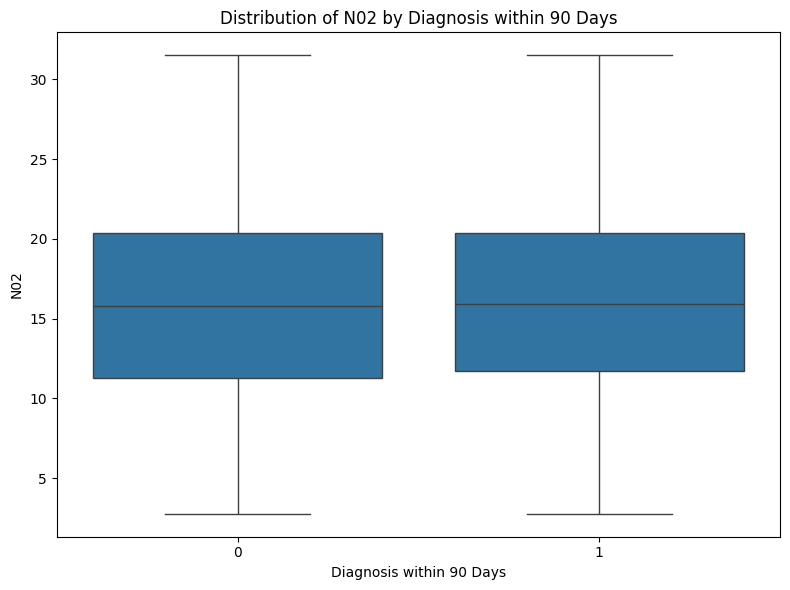

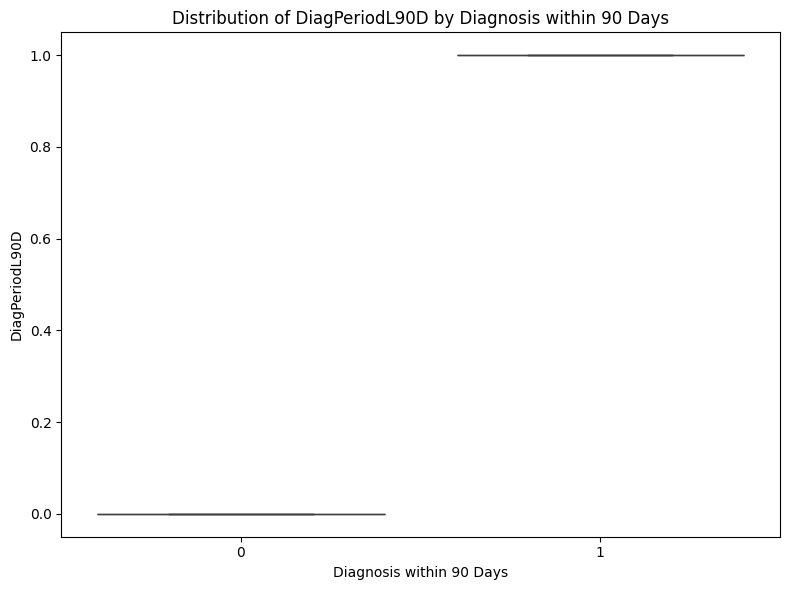

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_data = train_df.dropna(subset=train_df.select_dtypes(include=['int', 'float']).columns)

filtered_data_with_target = filtered_data.dropna(subset=['DiagPeriodL90D'])

numerical_columns = filtered_data_with_target.select_dtypes(include=['int', 'float']).columns

for feature in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='DiagPeriodL90D', y=feature, data=filtered_data_with_target)
    plt.title(f'Distribution of {feature} by Diagnosis within 90 Days')
    plt.xlabel('Diagnosis within 90 Days')
    plt.ylabel(feature)
    plt.tight_layout()

plt.show()



While these are a lot of plots, the main of plotting box plots for each class for each feature is to visualize how the classes vary for each feature and if it is possible to visually discern any noticeable differences across classes for these features. While none of these figure show any promising results, adding further cleaning and one-hot encoding the cateogorical variables will definitely help with out problem

## Data Cleaning

In [16]:
#there's too few entries with the following data meaning it is not substantial enough to affect my model training so I'm going to completely remove those variables and removing gender as well
train_df_cleaned = train_df.drop(columns=['metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type', 'patient_gender'])

#filling in the columns with the most missing data
train_df_cleaned.fillna({'patient_race':'Unknown'}, inplace=True)
train_df_cleaned['bmi'].fillna(train_df_cleaned['bmi'].median(), inplace=True)
train_df_cleaned.fillna({'payer_type':'Unknown'}, inplace=True)

In [17]:
train_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 80 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   patient_id                        12906 non-null  int64  
 1   patient_race                      12906 non-null  object 
 2   payer_type                        12906 non-null  object 
 3   patient_state                     12855 non-null  object 
 4   patient_zip3                      12906 non-null  int64  
 5   patient_age                       12906 non-null  int64  
 6   bmi                               12906 non-null  float64
 7   breast_cancer_diagnosis_code      12906 non-null  object 
 8   breast_cancer_diagnosis_desc      12906 non-null  object 
 9   metastatic_cancer_diagnosis_code  12906 non-null  object 
 10  Region                            12854 non-null  object 
 11  Division                          12854 non-null  object 
 12  popu

In [18]:
#Before I impute any other null values with mean or median, I want to simply drop the missing values and see what the remaining data is like
train_df_cleaned.dropna(inplace=True)
train_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12822 entries, 0 to 12905
Data columns (total 80 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   patient_id                        12822 non-null  int64  
 1   patient_race                      12822 non-null  object 
 2   payer_type                        12822 non-null  object 
 3   patient_state                     12822 non-null  object 
 4   patient_zip3                      12822 non-null  int64  
 5   patient_age                       12822 non-null  int64  
 6   bmi                               12822 non-null  float64
 7   breast_cancer_diagnosis_code      12822 non-null  object 
 8   breast_cancer_diagnosis_desc      12822 non-null  object 
 9   metastatic_cancer_diagnosis_code  12822 non-null  object 
 10  Region                            12822 non-null  object 
 11  Division                          12822 non-null  object 
 12  popu

In [19]:
#Now that we still have sufficient amount of data remaining, let's look at the categorical variables understand how to encode those
train_df_cleaned.select_dtypes(include=['object']).describe().T


,count,unique,top,freq
patient_race,12822,6,Unknown,6350
payer_type,12822,4,COMMERCIAL,6012
patient_state,12822,47,CA,2438
breast_cancer_diagnosis_code,12822,50,1749,1973
breast_cancer_diagnosis_desc,12822,50,"Malignant neoplasm of breast (female), unspeci...",1973
metastatic_cancer_diagnosis_code,12822,43,C773,7002
Region,12822,4,South,3914
Division,12822,9,East North Central,2923


In [20]:
#Before any encoding, I want to see if the breast cancer codes are always matched to the same desc
code_desc_mapping = train_df_cleaned.groupby('breast_cancer_diagnosis_code')['breast_cancer_diagnosis_desc'].unique().reset_index()
code_desc_mapping['desc_count'] = code_desc_mapping['breast_cancer_diagnosis_desc'].apply(len)
codes_with_multiple_descs = code_desc_mapping[code_desc_mapping['desc_count'] > 1]
code_desc_mapping

,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,desc_count
0,1741,[Malignant neoplasm of central portion of fema...,1
1,1742,[Malignant neoplasm of upper-inner quadrant of...,1
2,1743,[Malignant neoplasm of lower-inner quadrant of...,1
3,1744,[Malignant neoplasm of upper-outer quadrant of...,1
4,1745,[Malignant neoplasm of lower-outer quadrant of...,1
5,1746,[Malignant neoplasm of axillary tail of female...,1
6,1748,[Malignant neoplasm of other specified sites o...,1
7,1749,"[Malignant neoplasm of breast (female), unspec...",1
8,1759,[Malignant neoplasm of other and unspecified s...,1
9,19881,[Secondary malignant neoplasm of breast],1


Since, it seems like the code is always matched to one unique description, I can drop the description column and keep the code and encode them

In [21]:
# for those with <10 unique values I'll be one-hot encoding them. Encoding the breast cancer/metastic cancer variables will create too many new columns but let's test it for now
columns_to_encode = ['patient_race', 'payer_type', 'Region', 'Division', 'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code']

#also for now, I'll be dropping pateient state, we have enough information with region/division, environmental factors, and the location race diversity that state should not be needed
train_df_cleaned = train_df_cleaned.drop(columns=['patient_state' , 'breast_cancer_diagnosis_desc'])


# Applying one-hot encoding
train_df_cleaned = pd.get_dummies(train_df_cleaned, columns=columns_to_encode)
train_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12822 entries, 0 to 12905
Columns: 188 entries, patient_id to metastatic_cancer_diagnosis_code_C799
dtypes: float64(68), int64(4), uint8(116)
memory usage: 8.6 MB


In [22]:
train_df_cleaned

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,metastatic_cancer_diagnosis_code_C7960,metastatic_cancer_diagnosis_code_C7961,metastatic_cancer_diagnosis_code_C7962,metastatic_cancer_diagnosis_code_C7970,metastatic_cancer_diagnosis_code_C7971,metastatic_cancer_diagnosis_code_C7972,metastatic_cancer_diagnosis_code_C7981,metastatic_cancer_diagnosis_code_C7982,metastatic_cancer_diagnosis_code_C7989,metastatic_cancer_diagnosis_code_C799
0,475714,924,84,28.19,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,...,0,0,0,0,0,0,0,0,1,0
1,349367,928,62,28.49,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,...,0,0,0,0,0,0,0,0,0,0
2,138632,760,43,38.09,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,...,0,0,0,0,0,0,0,0,0,0
3,617843,926,45,28.19,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,...,0,0,0,0,0,0,0,0,0,0
4,817482,836,55,28.19,10886.26000,116.886000,43.473469,10.824000,13.976000,9.492000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,674178,436,50,32.11,19413.05882,1196.805882,36.911765,12.876471,13.435294,14.394118,...,0,0,0,0,0,0,0,0,0,0
12902,452909,945,50,28.19,30153.87952,976.289157,42.135802,10.753086,12.714815,11.725926,...,0,0,0,0,0,0,0,0,0,0
12903,357486,926,61,29.24,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,...,0,0,0,0,0,0,0,0,0,0
12904,935417,112,37,31.00,71374.13158,17326.407890,36.476316,12.986842,11.318421,14.971053,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#Now let's do the same changes to my test set as well
test_df_cleaned = test_df.drop(columns=['metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type', 'patient_gender'])

# Filling in the columns with the most missing data
test_df_cleaned.fillna({'patient_race': 'Unknown'}, inplace=True)
test_df_cleaned['bmi'].fillna(test_df_cleaned['bmi'].median(), inplace=True)
test_df_cleaned.fillna({'payer_type': 'Unknown'}, inplace=True)
# test_df_cleaned.dropna(inplace=True)

columns_to_encode = ['patient_race', 'payer_type', 'Region', 'Division', 'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code']

#also for now, I'll be dropping pateient state, we have enough information with region/division, environmental factors, and the location race diversity that state should not be needed
test_df_cleaned = test_df_cleaned.drop(columns=['patient_state' , 'breast_cancer_diagnosis_desc'])


# Applying one-hot encoding
test_df_cleaned = pd.get_dummies(test_df_cleaned, columns=columns_to_encode)
test_df_cleaned

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,metastatic_cancer_diagnosis_code_C7952,metastatic_cancer_diagnosis_code_C7960,metastatic_cancer_diagnosis_code_C7961,metastatic_cancer_diagnosis_code_C7970,metastatic_cancer_diagnosis_code_C7971,metastatic_cancer_diagnosis_code_C7972,metastatic_cancer_diagnosis_code_C7981,metastatic_cancer_diagnosis_code_C7982,metastatic_cancer_diagnosis_code_C7989,metastatic_cancer_diagnosis_code_C799
0,573710,467,54,28.15,5441.435484,85.620968,40.880328,12.732258,14.088710,10.659677,...,0,0,0,0,0,0,0,0,0,0
1,593679,337,52,28.15,19613.820510,1555.107692,49.107692,8.069231,8.587179,10.684615,...,0,0,0,0,0,0,0,0,0,0
2,184532,917,61,28.15,43030.500000,2048.578261,38.852174,11.306522,12.897826,14.121739,...,0,0,0,0,0,0,0,0,0,0
3,447383,917,64,28.15,43030.500000,2048.578261,38.852174,11.306522,12.897826,14.121739,...,0,0,0,0,0,0,0,0,0,0
4,687972,900,40,23.00,36054.117650,5294.330882,36.653846,9.761538,11.267692,17.233846,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5787,977076,404,63,29.60,7765.000000,131.040000,40.434783,11.556522,14.021739,13.208696,...,0,0,0,0,0,0,0,0,0,0
5788,922960,507,69,28.15,19332.750000,346.250000,38.525000,12.200000,13.025000,14.675000,...,0,0,0,0,0,0,0,0,0,0
5789,759690,980,84,28.28,28628.290910,1091.825455,39.679245,12.143396,12.462264,11.320755,...,0,0,0,0,0,0,0,0,0,0
5790,911717,740,58,28.15,9716.970149,150.602985,39.588060,11.768657,15.576119,12.500000,...,0,0,0,0,0,0,0,0,0,0


### Model Selection and Training

As mentioned above I have chosen three models, the Catboost, XGBoost and Random Forest classifier

In [24]:
!pip install xgboost
!pip install catboost



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\Aarti Darji\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\Aarti Darji\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier


I'm trying three different classifiers, I'm testing with random forest, XGBoost and CatBoost

In [26]:
X = train_df_cleaned.drop('DiagPeriodL90D', axis=1)
y = train_df_cleaned['DiagPeriodL90D']


In [27]:
X, test_df_cleaned = X.align((test_df_cleaned), join='outer', axis=1, fill_value=0)
test_df_cleaned = test_df_cleaned[X.columns]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [25]:
model = CatBoostClassifier(
    iterations=1000, 
    learning_rate=0.1, 
    depth=6,
    verbose=100,  
    eval_metric='Accuracy'  
)

In [26]:
model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)
predictions = model.predict(X_test)

0:	learn: 0.7942061	test: 0.7936054	best: 0.7936054 (0)	total: 167ms	remaining: 2m 46s
100:	learn: 0.8176045	test: 0.8076423	best: 0.8081622 (61)	total: 1.82s	remaining: 16.2s
200:	learn: 0.8344290	test: 0.8060827	best: 0.8081622 (61)	total: 3.31s	remaining: 13.2s
300:	learn: 0.8569359	test: 0.8060827	best: 0.8081622 (61)	total: 4.71s	remaining: 10.9s
400:	learn: 0.8794429	test: 0.8032233	best: 0.8081622 (61)	total: 6.1s	remaining: 9.11s
500:	learn: 0.8978273	test: 0.8001040	best: 0.8081622 (61)	total: 7.54s	remaining: 7.51s
600:	learn: 0.9142061	test: 0.7969847	best: 0.8081622 (61)	total: 8.99s	remaining: 5.97s
700:	learn: 0.9300279	test: 0.7964648	best: 0.8081622 (61)	total: 10.4s	remaining: 4.43s
800:	learn: 0.9412813	test: 0.7920457	best: 0.8081622 (61)	total: 11.8s	remaining: 2.93s
900:	learn: 0.9511978	test: 0.7915259	best: 0.8081622 (61)	total: 13.2s	remaining: 1.46s
999:	learn: 0.9594429	test: 0.7868469	best: 0.8081622 (61)	total: 14.7s	remaining: 0us

bestTest = 0.8081622043
b

In [27]:
random_forest_model = RandomForestClassifier(
    n_estimators=100,  
    max_depth=None,    
    random_state=42    
)

In [28]:
random_forest_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [29]:
# Making predictions
rf_predictions = random_forest_model.predict(X_test)

# Evaluation
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_predictions)}")
print(classification_report(y_test, rf_predictions))


Random Forest Accuracy: 0.7694307252404471
              precision    recall  f1-score   support

           0       0.77      0.55      0.64      1432
           1       0.77      0.90      0.83      2415

    accuracy                           0.77      3847
   macro avg       0.77      0.72      0.73      3847
weighted avg       0.77      0.77      0.76      3847



In [30]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,  
    max_depth=3,       
    learning_rate=0.1, 
    use_label_encoder=False,
    eval_metric='logloss',  
    random_state=42    
)

In [31]:
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)


[0]	validation_0-logloss:0.63111
[1]	validation_0-logloss:0.60827
[2]	validation_0-logloss:0.58976
[3]	validation_0-logloss:0.57477
[4]	validation_0-logloss:0.56237
[5]	validation_0-logloss:0.55211
[6]	validation_0-logloss:0.54356
[7]	validation_0-logloss:0.53617
[8]	validation_0-logloss:0.52985
[9]	validation_0-logloss:0.52432
[10]	validation_0-logloss:0.51956
[11]	validation_0-logloss:0.51527
[12]	validation_0-logloss:0.51179
[13]	validation_0-logloss:0.50834
[14]	validation_0-logloss:0.50557
[15]	validation_0-logloss:0.50294
[16]	validation_0-logloss:0.50068
[17]	validation_0-logloss:0.49882
[18]	validation_0-logloss:0.49673
[19]	validation_0-logloss:0.49511
[20]	validation_0-logloss:0.49375
[21]	validation_0-logloss:0.49252
[22]	validation_0-logloss:0.49140
[23]	validation_0-logloss:0.49027
[24]	validation_0-logloss:0.48927
[25]	validation_0-logloss:0.48829
[26]	validation_0-logloss:0.48725
[27]	validation_0-logloss:0.48646
[28]	validation_0-logloss:0.48582
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [32]:
# Making predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluation
print(f"XGBoost Accuracy: {accuracy_score(y_test, xgb_predictions)}")
print(classification_report(y_test, xgb_predictions))


XGBoost Accuracy: 0.8089420327527944
              precision    recall  f1-score   support

           0       0.91      0.54      0.68      1432
           1       0.78      0.97      0.86      2415

    accuracy                           0.81      3847
   macro avg       0.85      0.75      0.77      3847
weighted avg       0.83      0.81      0.79      3847



Just by taking a look, you can observe that random forest and xgboost have the highest performance accuracy. Here, I have just set one single value which can be inefficient, we can implement gird search to test with multiple different hyperparameters and decide which gives the best model performance.

In [33]:
# Grid Search for Random Forest

param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10]   
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
predictions = best_rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(classification_report(y_test, predictions))


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   4.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   3.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   4.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   3.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   3.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   8.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   7.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   7.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   7.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   9.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=  12.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=  11.7s
[CV]

In [34]:
rf_probs = best_rf.predict_proba(X_test)[:, 1] 

# Compute ROC AUC Score
rf_roc_auc = roc_auc_score(y_test, rf_probs)
print(f"Random Forest ROC AUC Score: {rf_roc_auc}")


Random Forest ROC AUC Score: 0.7772196004950437


Using grid search we can tell that the original hyperparameters result in the best performance

In [21]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
}


xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

random_search = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_dist, n_iter=25, cv=5, scoring='accuracy', verbose=2, random_state=42)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

best_xgb = random_search.best_estimator_
predictions = best_xgb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(classification_report(y_test, predictions))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.6; total time=   5.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.6; total time=   3.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.6; total time=   4.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.6; total time=   3.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.6; total time=   3.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=400, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=400, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=400, subsample=1.0; total time=   2.0s
[CV] END colsample

In [22]:
preds = best_xgb.predict_proba(X_test)[:, 1]
print(f"AUC Score: {roc_auc_score(y_test, preds)}")


AUC Score: 0.7906103612200284


In [23]:
X_new = test_df_cleaned

test_probabilities = best_xgb.predict_proba(X_new)[:, 1]

# Creating the submission DataFrame
results_df = pd.DataFrame({
    'patient_id': X_new['patient_id'],
    'DiagPeriodL90D': test_probabilities
})

results_df['patient_id'] = results_df['patient_id'].astype(int)

print(results_df.head())

results_df.to_csv('submission.csv', index=False)


   patient_id  DiagPeriodL90D
0      573710        0.852010
1      593679        0.763621
2      184532        0.796022
3      447383        0.774147
4      687972        0.836884


Public Score: 0.796 and Private score: 0.779 on Kaggle. The kaggle score approximately matches the auc score that I get when I test on the a subset of the original train dataset. 




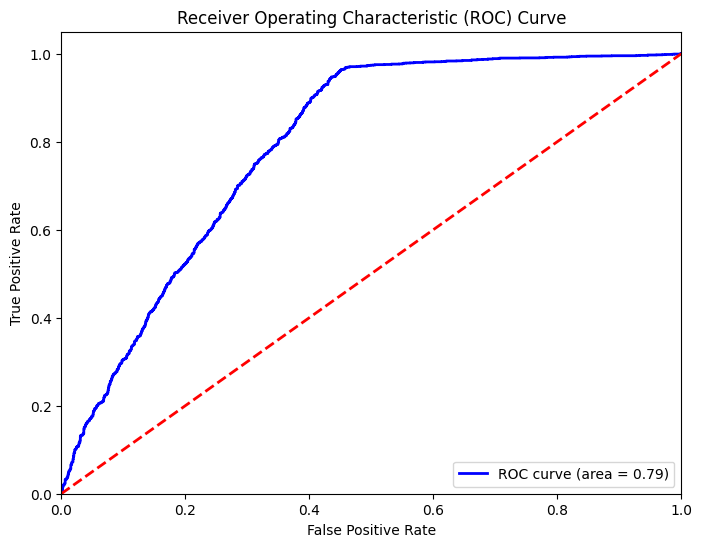

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

# Plot ROC curve
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()




The figure above shows auc curve area for our model

[0]	validation_0-logloss:0.63111
[1]	validation_0-logloss:0.60827
[2]	validation_0-logloss:0.58976
[3]	validation_0-logloss:0.57477
[4]	validation_0-logloss:0.56237
[5]	validation_0-logloss:0.55211
[6]	validation_0-logloss:0.54356
[7]	validation_0-logloss:0.53617
[8]	validation_0-logloss:0.52985
[9]	validation_0-logloss:0.52432
[10]	validation_0-logloss:0.51956
[11]	validation_0-logloss:0.51527
[12]	validation_0-logloss:0.51179
[13]	validation_0-logloss:0.50834
[14]	validation_0-logloss:0.50557
[15]	validation_0-logloss:0.50294
[16]	validation_0-logloss:0.50068
[17]	validation_0-logloss:0.49882
[18]	validation_0-logloss:0.49673
[19]	validation_0-logloss:0.49511
[20]	validation_0-logloss:0.49375
[21]	validation_0-logloss:0.49252
[22]	validation_0-logloss:0.49140
[23]	validation_0-logloss:0.49027
[24]	validation_0-logloss:0.48927
[25]	validation_0-logloss:0.48829
[26]	validation_0-logloss:0.48725
[27]	validation_0-logloss:0.48646
[28]	validation_0-logloss:0.48582
[29]	validation_0-loglos

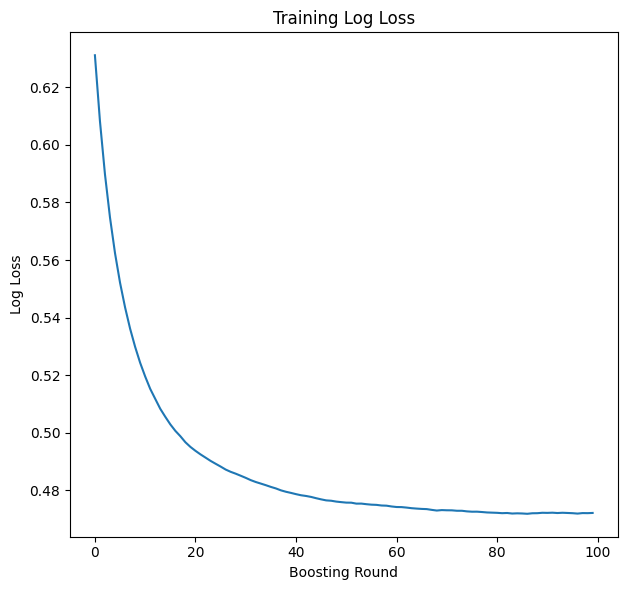

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, log_loss
import xgboost as xgb

best_xgb_model = xgb.XGBClassifier(
    n_estimators=100,  
    max_depth=3,       
    learning_rate=0.05, 
    use_label_encoder=False,
    eval_metric=['logloss'],  
    random_state=42    
)

best_xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

train_predictions = best_xgb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
train_loss = log_loss(y_train, best_xgb_model.predict_proba(X_train))

training_history = best_xgb_model.evals_result()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
train_log_loss = training_history['validation_0']['logloss']
plt.plot(train_log_loss, label='Train')
plt.xlabel('Boosting Round')
plt.ylabel('Log Loss')
plt.title('Training Log Loss')

plt.tight_layout()
plt.show()


The above shows us the training log loss and we can see that decreasing through the iterations which is a sign that the model is performing well